In [1]:
# !pip install jedi
# !pip install Pillow==9.3
#-m pip install --upgrade pip

In [2]:
%pip install autogluon
%pip install pillow==8.4.0
%pip install --upgrade mxnet
%pip install pandas
%pip install numpy
%pip install matplotlib

#designed for Jupyter/kaggle/colab
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing
#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor  

In [3]:
#metatrader5 file format
df=pd.read_csv('data.csv')      

NameError: name 'pd' is not defined

In [ ]:
print(df.head())
print(df.tail())
df.info()

  <DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
0         2020.01.02\t06:00:00\t1.12132\t1.12133\t1.12128\t1.12131\t14\t0\t3
1         2020.01.02\t06:01:00\t1.12131\t1.12133\t1.12131\t1.12132\t16\t0\t4
2          2020.01.02\t06:02:00\t1.12132\t1.12133\t1.12131\t1.12132\t9\t0\t3
3         2020.01.02\t06:03:00\t1.12132\t1.12134\t1.12132\t1.12132\t19\t0\t3
4          2020.01.02\t06:04:00\t1.12132\t1.12133\t1.12132\t1.12132\t3\t0\t4
        <DATE>\t<TIME>\t<OPEN>\t<HIGH>\t<LOW>\t<CLOSE>\t<TICKVOL>\t<VOL>\t<SPREAD>
1199525        2023.03.21\t09:12:00\t1.07112\t1.07115\t1.07082\t1.07085\t126\t0\t0
1199526        2023.03.21\t09:13:00\t1.07086\t1.07116\t1.07086\t1.07115\t138\t0\t0
1199527         2023.03.21\t09:14:00\t1.07115\t1.07128\t1.07112\t1.07115\t93\t0\t0
1199528        2023.03.21\t09:15:00\t1.07115\t1.07150\t1.07113\t1.07144\t129\t0\t0
1199529         2023.03.21\t09:16:00\t1.07143\t1.07143\t1.07128\t1.07130\t67\t0\t0
<class 'pandas.core.frame.DataFrame'>
Ra

In [ ]:
df.columns=['header']


In [ ]:
df = df.header.str.split('\t', expand=True)


In [ ]:
df

,0,1,2,3,4,5,6,7,8
0,2020.01.02,06:00:00,1.12132,1.12133,1.12128,1.12131,14,0,3
1,2020.01.02,06:01:00,1.12131,1.12133,1.12131,1.12132,16,0,4
2,2020.01.02,06:02:00,1.12132,1.12133,1.12131,1.12132,9,0,3
3,2020.01.02,06:03:00,1.12132,1.12134,1.12132,1.12132,19,0,3
4,2020.01.02,06:04:00,1.12132,1.12133,1.12132,1.12132,3,0,4
...,...,...,...,...,...,...,...,...,...
1199525,2023.03.21,09:12:00,1.07112,1.07115,1.07082,1.07085,126,0,0
1199526,2023.03.21,09:13:00,1.07086,1.07116,1.07086,1.07115,138,0,0
1199527,2023.03.21,09:14:00,1.07115,1.07128,1.07112,1.07115,93,0,0
1199528,2023.03.21,09:15:00,1.07115,1.07150,1.07113,1.07144,129,0,0


In [ ]:
#choose range of data for backtesting
df['date_time'] = df[0] + ' ' + df[1]
pd.to_datetime(df.date_time)
df.set_index('date_time',inplace=True)
df.drop(columns=[0,1], inplace=True)
df

,2,3,4,5,6,7,8
date_time,,,,,,,
2020.01.02 06:00:00,1.12132,1.12133,1.12128,1.12131,14,0,3
2020.01.02 06:01:00,1.12131,1.12133,1.12131,1.12132,16,0,4
2020.01.02 06:02:00,1.12132,1.12133,1.12131,1.12132,9,0,3
2020.01.02 06:03:00,1.12132,1.12134,1.12132,1.12132,19,0,3
2020.01.02 06:04:00,1.12132,1.12133,1.12132,1.12132,3,0,4
...,...,...,...,...,...,...,...
2023.03.21 09:12:00,1.07112,1.07115,1.07082,1.07085,126,0,0
2023.03.21 09:13:00,1.07086,1.07116,1.07086,1.07115,138,0,0
2023.03.21 09:14:00,1.07115,1.07128,1.07112,1.07115,93,0,0


In [ ]:
#df_close_col = pd.DataFrame(data=df.iloc[:,5].tail(576000))
df_c = pd.DataFrame(df.loc['2000.12.01 00:00:00':'2023.03.31 00:00:00',5])

In [ ]:
df_c

,5
date_time,
2020.01.02 06:00:00,1.12131
2020.01.02 06:01:00,1.12132
2020.01.02 06:02:00,1.12132
2020.01.02 06:03:00,1.12132
2020.01.02 06:04:00,1.12132
...,...
2023.03.21 09:12:00,1.07085
2023.03.21 09:13:00,1.07115
2023.03.21 09:14:00,1.07115


In [ ]:
#df_C = df_c.reset_index(level=0)

In [ ]:
#df_C['index'] = df_c.index
df_c

,5
date_time,
2020.01.02 06:00:00,1.12131
2020.01.02 06:01:00,1.12132
2020.01.02 06:02:00,1.12132
2020.01.02 06:03:00,1.12132
2020.01.02 06:04:00,1.12132
...,...
2023.03.21 09:12:00,1.07085
2023.03.21 09:13:00,1.07115
2023.03.21 09:14:00,1.07115


In [ ]:
df_c.reset_index(inplace=True)
df_c

,date_time,5
0,2020.01.02 06:00:00,1.12131
1,2020.01.02 06:01:00,1.12132
2,2020.01.02 06:02:00,1.12132
3,2020.01.02 06:03:00,1.12132
4,2020.01.02 06:04:00,1.12132
...,...,...
1199525,2023.03.21 09:12:00,1.07085
1199526,2023.03.21 09:13:00,1.07115
1199527,2023.03.21 09:14:00,1.07115
1199528,2023.03.21 09:15:00,1.07144


In [ ]:
df_c.drop(['date_time'], axis=1, inplace=True)
df_c

,5
0,1.12131
1,1.12132
2,1.12132
3,1.12132
4,1.12132
...,...
1199525,1.07085
1199526,1.07115
1199527,1.07115
1199528,1.07144


In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199530 entries, 0 to 1199529
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   5       1199530 non-null  object
dtypes: object(1)
memory usage: 9.2+ MB


In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199530 entries, 0 to 1199529
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   5       1199530 non-null  object
dtypes: object(1)
memory usage: 9.2+ MB


In [ ]:
df_close_col = df_c

In [ ]:
df_close_col[5] = df_close_col[5].astype(float, errors = 'raise')

In [ ]:
df_close_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199530 entries, 0 to 1199529
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   5       1199530 non-null  float64
dtypes: float64(1)
memory usage: 9.2 MB


In [ ]:
df_close_col.isnull().sum()  

5    0
dtype: int64

In [ ]:
##include date time at column index 0,1###


In [ ]:
df_close_col

,5
0,1.12131
1,1.12132
2,1.12132
3,1.12132
4,1.12132
...,...
1199525,1.07085
1199526,1.07115
1199527,1.07115
1199528,1.07144


In [ ]:
###df361 to df400###

# df401 = pd.DataFrame(data=df_close_col.iloc[-578880:-577440])
# df401['row_num']=np.arange(len(df401))
# df401.set_index('row_num',inplace=True)
# df401 = df401.rename(columns={5:'day_401'})
# print(df401)


In [ ]:
###df401 to df440###

df440 = pd.DataFrame(data=df_close_col.iloc[-635000:-633560])
df440['row_num']=np.arange(len(df440))
df440.set_index('row_num',inplace=True)
df440 = df440.rename(columns={5:'day_440'})
print(df440)

df439 = pd.DataFrame(data=df_close_col.iloc[-633560:-632120])
df439['row_num']=np.arange(len(df439))
df439.set_index('row_num',inplace=True)
df439 = df439.rename(columns={5:'day_439'})
print(df439)

df438 = pd.DataFrame(data=df_close_col.iloc[-632120:-630680])
df438['row_num']=np.arange(len(df438))
df438.set_index('row_num',inplace=True)
df438 = df438.rename(columns={5:'day_438'})
print(df438)

df437 = pd.DataFrame(data=df_close_col.iloc[-630680:-629240])
df437['row_num']=np.arange(len(df437))
df437.set_index('row_num',inplace=True)
df437 = df437.rename(columns={5:'day_437'})
print(df437)

df436 = pd.DataFrame(data=df_close_col.iloc[-629240:-627800])
df436['row_num']=np.arange(len(df436))
df436.set_index('row_num',inplace=True)
df436 = df436.rename(columns={5:'day_436'})
print(df436)

df435 = pd.DataFrame(data=df_close_col.iloc[-627800:-626360])
df435['row_num']=np.arange(len(df435))
df435.set_index('row_num',inplace=True)
df435 = df435.rename(columns={5:'day_435'})
print(df435)

df434 = pd.DataFrame(data=df_close_col.iloc[-626360:-624920])
df434['row_num']=np.arange(len(df434))
df434.set_index('row_num',inplace=True)
df434 = df434.rename(columns={5:'day_434'})
print(df434)

df433 = pd.DataFrame(data=df_close_col.iloc[-624920:-623480])
df433['row_num']=np.arange(len(df433))
df433.set_index('row_num',inplace=True)
df433 = df433.rename(columns={5:'day_433'})
print(df433)

df432 = pd.DataFrame(data=df_close_col.iloc[-623480:-622040])
df432['row_num']=np.arange(len(df432))
df432.set_index('row_num',inplace=True)
df432 = df432.rename(columns={5:'day_432'})
print(df432)

df431 = pd.DataFrame(data=df_close_col.iloc[-622040:-620600])
df431['row_num']=np.arange(len(df431))
df431.set_index('row_num',inplace=True)
df431 = df431.rename(columns={5:'day_431'})
print(df431)

df430 = pd.DataFrame(data=df_close_col.iloc[-620600:-619160])
df430['row_num']=np.arange(len(df430))
df430.set_index('row_num',inplace=True)
df430 = df430.rename(columns={5:'day_430'})
print(df430)

df429 = pd.DataFrame(data=df_close_col.iloc[-619160:-617720])
df429['row_num']=np.arange(len(df429))
df429.set_index('row_num',inplace=True)
df429 = df429.rename(columns={5:'day_429'})
print(df429)

df428 = pd.DataFrame(data=df_close_col.iloc[-617720:-616280])
df428['row_num']=np.arange(len(df428))
df428.set_index('row_num',inplace=True)
df428 = df428.rename(columns={5:'day_428'})
print(df428)

df427 = pd.DataFrame(data=df_close_col.iloc[-616280:-614840])
df427['row_num']=np.arange(len(df427))
df427.set_index('row_num',inplace=True)
df427 = df427.rename(columns={5:'day_427'})
print(df427)

df426 = pd.DataFrame(data=df_close_col.iloc[-614840:-613400])
df426['row_num']=np.arange(len(df426))
df426.set_index('row_num',inplace=True)
df426 = df426.rename(columns={5:'day_426'})
print(df426)

df425 = pd.DataFrame(data=df_close_col.iloc[-613400:-611960])
df425['row_num']=np.arange(len(df425))
df425.set_index('row_num',inplace=True)
df425 = df425.rename(columns={5:'day_425'})
print(df425)

df424 = pd.DataFrame(data=df_close_col.iloc[-611960:-610520])
df424['row_num']=np.arange(len(df424))
df424.set_index('row_num',inplace=True)
df424 = df424.rename(columns={5:'day_424'})
print(df424)

df423 = pd.DataFrame(data=df_close_col.iloc[-610520:-609080])
df423['row_num']=np.arange(len(df423))
df423.set_index('row_num',inplace=True)
df423 = df423.rename(columns={5:'day_423'})
print(df423)

df422 = pd.DataFrame(data=df_close_col.iloc[-609080:-607640])
df422['row_num']=np.arange(len(df422))
df422.set_index('row_num',inplace=True)
df422 = df422.rename(columns={5:'day_422'})
print(df422)

df421 = pd.DataFrame(data=df_close_col.iloc[-607640:-606200])
df421['row_num']=np.arange(len(df421))
df421.set_index('row_num',inplace=True)
df421 = df421.rename(columns={5:'day_421'})
print(df421)

df420 = pd.DataFrame(data=df_close_col.iloc[-606200:-604760])
df420['row_num']=np.arange(len(df420))
df420.set_index('row_num',inplace=True)
df420 = df420.rename(columns={5:'day_420'})
print(df420)

df419 = pd.DataFrame(data=df_close_col.iloc[-604760:-603320])
df419['row_num']=np.arange(len(df419))
df419.set_index('row_num',inplace=True)
df419 = df419.rename(columns={5:'day_419'})
print(df419)

df418 = pd.DataFrame(data=df_close_col.iloc[-603320:-601880])
df418['row_num']=np.arange(len(df418))
df418.set_index('row_num',inplace=True)
df418 = df418.rename(columns={5:'day_418'})
print(df418)

df417 = pd.DataFrame(data=df_close_col.iloc[-601880:-600440])
df417['row_num']=np.arange(len(df417))
df417.set_index('row_num',inplace=True)
df417 = df417.rename(columns={5:'day_417'})
print(df417)

df416 = pd.DataFrame(data=df_close_col.iloc[-600440:-599000])
df416['row_num']=np.arange(len(df416))
df416.set_index('row_num',inplace=True)
df416 = df416.rename(columns={5:'day_416'})
print(df416)

df415 = pd.DataFrame(data=df_close_col.iloc[-599000:-597560])
df415['row_num']=np.arange(len(df415))
df415.set_index('row_num',inplace=True)
df415 = df415.rename(columns={5:'day_415'})
print(df415)

df414 = pd.DataFrame(data=df_close_col.iloc[-597560:-596120])
df414['row_num']=np.arange(len(df414))
df414.set_index('row_num',inplace=True)
df414 = df414.rename(columns={5:'day_414'})
print(df414)

df413 = pd.DataFrame(data=df_close_col.iloc[-596120:-594680])
df413['row_num']=np.arange(len(df413))
df413.set_index('row_num',inplace=True)
df413 = df413.rename(columns={5:'day_413'})
print(df413)

df412 = pd.DataFrame(data=df_close_col.iloc[-594680:-593240])
df412['row_num']=np.arange(len(df412))
df412.set_index('row_num',inplace=True)
df412 = df412.rename(columns={5:'day_412'})
print(df412)

df411 = pd.DataFrame(data=df_close_col.iloc[-593240:-591800])
df411['row_num']=np.arange(len(df411))
df411.set_index('row_num',inplace=True)
df411 = df411.rename(columns={5:'day_411'})
print(df411)

df410 = pd.DataFrame(data=df_close_col.iloc[-591800:-590400])
df410['row_num']=np.arange(len(df410))
df410.set_index('row_num',inplace=True)
df410 = df410.rename(columns={5:'day_410'})
print(df410)

df409 = pd.DataFrame(data=df_close_col.iloc[-590400:-588960])
df409['row_num']=np.arange(len(df409))
df409.set_index('row_num',inplace=True)
df409 = df409.rename(columns={5:'day_409'})
print(df409)

df408 = pd.DataFrame(data=df_close_col.iloc[-588960:-587520])
df408['row_num']=np.arange(len(df408))
df408.set_index('row_num',inplace=True)
df408 = df408.rename(columns={5:'day_408'})
print(df408)

df407 = pd.DataFrame(data=df_close_col.iloc[-587520:-586080])
df407['row_num']=np.arange(len(df407))
df407.set_index('row_num',inplace=True)
df407 = df407.rename(columns={5:'day_407'})
print(df407)

df406 = pd.DataFrame(data=df_close_col.iloc[-586080:-584640])
df406['row_num']=np.arange(len(df406))
df406.set_index('row_num',inplace=True)
df406 = df406.rename(columns={5:'day_406'})
print(df406)

df405 = pd.DataFrame(data=df_close_col.iloc[-584640:-583200])
df405['row_num']=np.arange(len(df405))
df405.set_index('row_num',inplace=True)
df405 = df405.rename(columns={5:'day_405'})
print(df405)

df404 = pd.DataFrame(data=df_close_col.iloc[-583200:-581760])
df404['row_num']=np.arange(len(df404))
df404.set_index('row_num',inplace=True)
df404 = df404.rename(columns={5:'day_404'})
print(df404)

df403 = pd.DataFrame(data=df_close_col.iloc[-581760:-580320])
df403['row_num']=np.arange(len(df403))
df403.set_index('row_num',inplace=True)
df403 = df403.rename(columns={5:'day_403'})
print(df403)

df402 = pd.DataFrame(data=df_close_col.iloc[-580320:-578880])
df402['row_num']=np.arange(len(df402))
df402.set_index('row_num',inplace=True)
df402 = df402.rename(columns={5:'day_402'})
print(df402)

df401 = pd.DataFrame(data=df_close_col.iloc[-578880:-577440])
df401['row_num']=np.arange(len(df401))
df401.set_index('row_num',inplace=True)
df401 = df401.rename(columns={5:'day_401'})
print(df401)

         day_440
row_num         
0        1.18125
1        1.18151
2        1.18148
3        1.18148
4        1.18140
...          ...
1435     1.18378
1436     1.18402
1437     1.18417
1438     1.18407
1439     1.18421

[1440 rows x 1 columns]
         day_439
row_num         
0        1.18398
1        1.18393
2        1.18387
3        1.18383
4        1.18392
...          ...
1435     1.18750
1436     1.18755
1437     1.18739
1438     1.18716
1439     1.18707

[1440 rows x 1 columns]
         day_438
row_num         
0        1.18708
1        1.18704
2        1.18695
3        1.18718
4        1.18735
...          ...
1435     1.18503
1436     1.18494
1437     1.18495
1438     1.18485
1439     1.18490

[1440 rows x 1 columns]
         day_437
row_num         
0        1.18488
1        1.18478
2        1.18471
3        1.18479
4        1.18475
...          ...
1435     1.17948
1436     1.17955
1437     1.17966
1438     1.17977
1439     1.17984

[1440 rows x 1 columns]
         day_436

In [ ]:
###df361 to df400###

df400 = pd.DataFrame(data=df_close_col.iloc[-577440:-576000])
df400['row_num']=np.arange(len(df400))
df400.set_index('row_num',inplace=True)
df400 = df400.rename(columns={5:'day_400'})
print(df400)

df399 = pd.DataFrame(data=df_close_col.iloc[-576000:-574560])
df399['row_num']=np.arange(len(df399))
df399.set_index('row_num',inplace=True)
df399 = df399.rename(columns={5:'day_399'})
print(df399)

df398 = pd.DataFrame(data=df_close_col.iloc[-574560:-573120])
df398['row_num']=np.arange(len(df398))
df398.set_index('row_num',inplace=True)
df398 = df398.rename(columns={5:'day_398'})
print(df398)

df397 = pd.DataFrame(data=df_close_col.iloc[-573120:-571680])
df397['row_num']=np.arange(len(df397))
df397.set_index('row_num',inplace=True)
df397 = df397.rename(columns={5:'day_397'})
print(df397)

df396 = pd.DataFrame(data=df_close_col.iloc[-571680:-570240])
df396['row_num']=np.arange(len(df396))
df396.set_index('row_num',inplace=True)
df396 = df396.rename(columns={5:'day_396'})
print(df396)

df395 = pd.DataFrame(data=df_close_col.iloc[-570240:-568800])
df395['row_num']=np.arange(len(df395))
df395.set_index('row_num',inplace=True)
df395 = df395.rename(columns={5:'day_395'})
print(df395)

df394 = pd.DataFrame(data=df_close_col.iloc[-568800:-567360])
df394['row_num']=np.arange(len(df394))
df394.set_index('row_num',inplace=True)
df394 = df394.rename(columns={5:'day_394'})
print(df394)

df393 = pd.DataFrame(data=df_close_col.iloc[-567360:-565920])
df393['row_num']=np.arange(len(df393))
df393.set_index('row_num',inplace=True)
df393 = df393.rename(columns={5:'day_393'})
print(df393)

df392 = pd.DataFrame(data=df_close_col.iloc[-565920:-564480])
df392['row_num']=np.arange(len(df392))
df392.set_index('row_num',inplace=True)
df392 = df392.rename(columns={5:'day_392'})
print(df392)

df391 = pd.DataFrame(data=df_close_col.iloc[-564480:-563040])
df391['row_num']=np.arange(len(df391))
df391.set_index('row_num',inplace=True)
df391 = df391.rename(columns={5:'day_391'})
print(df391)

df390 = pd.DataFrame(data=df_close_col.iloc[-563040:-561600])
df390['row_num']=np.arange(len(df390))
df390.set_index('row_num',inplace=True)
df390 = df390.rename(columns={5:'day_390'})
print(df390)


df389 = pd.DataFrame(data=df_close_col.iloc[-561600:-560160])
df389['row_num']=np.arange(len(df389))
df389.set_index('row_num',inplace=True)
df389 = df389.rename(columns={5:'day_389'})
print(df389)

df388 = pd.DataFrame(data=df_close_col.iloc[-560160:-558720])
df388['row_num']=np.arange(len(df388))
df388.set_index('row_num',inplace=True)
df388 = df388.rename(columns={5:'day_388'})
print(df388)

df387 = pd.DataFrame(data=df_close_col.iloc[-558720:-557280])
df387['row_num']=np.arange(len(df387))
df387.set_index('row_num',inplace=True)
df387 = df387.rename(columns={5:'day_387'})
print(df387)

df386 = pd.DataFrame(data=df_close_col.iloc[-557280:-555840])
df386['row_num']=np.arange(len(df386))
df386.set_index('row_num',inplace=True)
df386 = df386.rename(columns={5:'day_386'})
print(df386)

df385 = pd.DataFrame(data=df_close_col.iloc[-555840:-554400])
df385['row_num']=np.arange(len(df385))
df385.set_index('row_num',inplace=True)
df385 = df385.rename(columns={5:'day_385'})
print(df385)

df384 = pd.DataFrame(data=df_close_col.iloc[-554400:-552960])
df384['row_num']=np.arange(len(df384))
df384.set_index('row_num',inplace=True)
df384 = df384.rename(columns={5:'day_384'})
print(df384)

df383 = pd.DataFrame(data=df_close_col.iloc[-552960:-551520])
df383['row_num']=np.arange(len(df383))
df383.set_index('row_num',inplace=True)
df383 = df383.rename(columns={5:'day_383'})
print(df383)


df382 = pd.DataFrame(data=df_close_col.iloc[-551520:-550080])
df382['row_num']=np.arange(len(df382))
df382.set_index('row_num',inplace=True)
df382 = df382.rename(columns={5:'day_382'})
print(df382)

df381 = pd.DataFrame(data=df_close_col.iloc[-550080:-548640])
df381['row_num']=np.arange(len(df381))
df381.set_index('row_num',inplace=True)
df381 = df381.rename(columns={5:'day_381'})
print(df381)

df380 = pd.DataFrame(data=df_close_col.iloc[-548640:-547200])
df380['row_num']=np.arange(len(df380))
df380.set_index('row_num',inplace=True)
df380 = df380.rename(columns={5:'day_380'})
print(df380)

df379 = pd.DataFrame(data=df_close_col.iloc[-547200:-545760])
df379['row_num']=np.arange(len(df379))
df379.set_index('row_num',inplace=True)
df379 = df379.rename(columns={5:'day_379'})
print(df379)

df378 = pd.DataFrame(data=df_close_col.iloc[-545760:-544320])
df378['row_num']=np.arange(len(df378))
df378.set_index('row_num',inplace=True)
df378 = df378.rename(columns={5:'day_378'})
print(df378)

df377 = pd.DataFrame(data=df_close_col.iloc[-544320:-542880])
df377['row_num']=np.arange(len(df377))
df377.set_index('row_num',inplace=True)
df377 = df377.rename(columns={5:'day_377'})
print(df377)

df376 = pd.DataFrame(data=df_close_col.iloc[-542880:-541440])
df376['row_num']=np.arange(len(df376))
df376.set_index('row_num',inplace=True)
df376 = df376.rename(columns={5:'day_376'})
print(df376)


df375 = pd.DataFrame(data=df_close_col.iloc[-541440:-540000])
df375['row_num']=np.arange(len(df375))
df375.set_index('row_num',inplace=True)
df375 = df375.rename(columns={5:'day_375'})
print(df375)

df374 = pd.DataFrame(data=df_close_col.iloc[-540000:-538560])
df374['row_num']=np.arange(len(df374))
df374.set_index('row_num',inplace=True)
df374 = df374.rename(columns={5:'day_374'})
print(df374)

df373 = pd.DataFrame(data=df_close_col.iloc[-538560:-537120])
df373['row_num']=np.arange(len(df373))
df373.set_index('row_num',inplace=True)
df373 = df373.rename(columns={5:'day_373'})
print(df373)

df372 = pd.DataFrame(data=df_close_col.iloc[-537120:-535680])
df372['row_num']=np.arange(len(df372))
df372.set_index('row_num',inplace=True)
df372 = df372.rename(columns={5:'day_372'})
print(df372)


df371 = pd.DataFrame(data=df_close_col.iloc[-535680:-534240])
df371['row_num']=np.arange(len(df371))
df371.set_index('row_num',inplace=True)
df371 = df371.rename(columns={5:'day_371'})
print(df371)

df370 = pd.DataFrame(data=df_close_col.iloc[-534240:-532800])
df370['row_num']=np.arange(len(df370))
df370.set_index('row_num',inplace=True)
df370 = df370.rename(columns={5:'day_370'})
print(df370)

df369 = pd.DataFrame(data=df_close_col.iloc[-532800:-531360])
df369['row_num']=np.arange(len(df369))
df369.set_index('row_num',inplace=True)
df369 = df369.rename(columns={5:'day_369'})
print(df369)

df368 = pd.DataFrame(data=df_close_col.iloc[-531360:-529920])
df368['row_num']=np.arange(len(df368))
df368.set_index('row_num',inplace=True)
df368 = df368.rename(columns={5:'day_368'})
print(df368)


df367 = pd.DataFrame(data=df_close_col.iloc[-529920:-528480])
df367['row_num']=np.arange(len(df367))
df367.set_index('row_num',inplace=True)
df367 = df367.rename(columns={5:'day_367'})
print(df367)

df366 = pd.DataFrame(data=df_close_col.iloc[-528480:-527040])
df366['row_num']=np.arange(len(df366))
df366.set_index('row_num',inplace=True)
df366 = df366.rename(columns={5:'day_366'})
print(df366)

df365 = pd.DataFrame(data=df_close_col.iloc[-527040:-525600])
df365['row_num']=np.arange(len(df365))
df365.set_index('row_num',inplace=True)
df365 = df365.rename(columns={5:'day_365'})
print(df365)

df364 = pd.DataFrame(data=df_close_col.iloc[-525600:-524160])
df364['row_num']=np.arange(len(df364))
df364.set_index('row_num',inplace=True)
df364 = df364.rename(columns={5:'day_364'})
print(df364)
#to prevent rewriting 364 to 380 I used 363a,b 
df363 = pd.DataFrame(data=df_close_col.iloc[-524160:-522720])
df363['row_num']=np.arange(len(df363))
df363.set_index('row_num',inplace=True)
df363 = df363.rename(columns={5:'day_363'})
print(df363)

df362 = pd.DataFrame(data=df_close_col.iloc[-522720:-521280])
df362['row_num']=np.arange(len(df362))
df362.set_index('row_num',inplace=True)
df362 = df362.rename(columns={5:'day_362'})
print(df362)

df361 = pd.DataFrame(data=df_close_col.iloc[-521280:-519840])
df361['row_num']=np.arange(len(df361))
df361.set_index('row_num',inplace=True)
df361 = df361.rename(columns={5:'day_361'})
print(df361)

         day_400
row_num         
0        1.18457
1        1.18458
2        1.18455
3        1.18458
4        1.18458
...          ...
1435     1.18750
1436     1.18747
1437     1.18747
1438     1.18751
1439     1.18746

[1440 rows x 1 columns]
         day_399
row_num         
0        1.18732
1        1.18729
2        1.18702
3        1.18707
4        1.18716
...          ...
1435     1.18637
1436     1.18624
1437     1.18636
1438     1.18638
1439     1.18631

[1440 rows x 1 columns]
         day_398
row_num         
0        1.18632
1        1.18627
2        1.18613
3        1.18620
4        1.18624
...          ...
1435     1.18795
1436     1.18781
1437     1.18770
1438     1.18767
1439     1.18779

[1440 rows x 1 columns]
         day_397
row_num         
0        1.18756
1        1.18757
2        1.18749
3        1.18732
4        1.18732
...          ...
1435     1.18255
1436     1.18248
1437     1.18225
1438     1.18191
1439     1.18186

[1440 rows x 1 columns]
         day_396

In [ ]:
###df321 to df360###
df360 = pd.DataFrame(data=df_close_col.iloc[-519840:-518400])
df360['row_num']=np.arange(len(df360))
df360.set_index('row_num',inplace=True)
df360 = df360.rename(columns={5:'day_360'})
print(df360)

df359 = pd.DataFrame(data=df_close_col.iloc[-518400:-516960])
df359['row_num']=np.arange(len(df359))
df359.set_index('row_num',inplace=True)
df359 = df359.rename(columns={5:'day_359'})
print(df359)

df358 = pd.DataFrame(data=df_close_col.iloc[-516960:-515520])
df358['row_num']=np.arange(len(df358))
df358.set_index('row_num',inplace=True)
df358 = df358.rename(columns={5:'day_358'})
print(df358)

df357 = pd.DataFrame(data=df_close_col.iloc[-515520:-514080])
df357['row_num']=np.arange(len(df357))
df357.set_index('row_num',inplace=True)
df357 = df357.rename(columns={5:'day_357'})
print(df357)

df356 = pd.DataFrame(data=df_close_col.iloc[-514080:-512640])
df356['row_num']=np.arange(len(df356))
df356.set_index('row_num',inplace=True)
df356 = df356.rename(columns={5:'day_356'})
print(df356)

df355 = pd.DataFrame(data=df_close_col.iloc[-512640:-511200])
df355['row_num']=np.arange(len(df355))
df355.set_index('row_num',inplace=True)
df355 = df355.rename(columns={5:'day_355'})
print(df355)

df354 = pd.DataFrame(data=df_close_col.iloc[-511200:-509760])
df354['row_num']=np.arange(len(df354))
df354.set_index('row_num',inplace=True)
df354 = df354.rename(columns={5:'day_354'})
print(df354)

df353 = pd.DataFrame(data=df_close_col.iloc[-509760:-508320])
df353['row_num']=np.arange(len(df353))
df353.set_index('row_num',inplace=True)
df353 = df353.rename(columns={5:'day_353'})
print(df353)

df352 = pd.DataFrame(data=df_close_col.iloc[-508320:-506880])
df352['row_num']=np.arange(len(df352))
df352.set_index('row_num',inplace=True)
df352 = df352.rename(columns={5:'day_352'})
print(df352)

df351 = pd.DataFrame(data=df_close_col.iloc[-506880:-505440])
df351['row_num']=np.arange(len(df351))
df351.set_index('row_num',inplace=True)
df351 = df351.rename(columns={5:'day_351'})
print(df351)

df350 = pd.DataFrame(data=df_close_col.iloc[-505440:-504000])
df350['row_num']=np.arange(len(df350))
df350.set_index('row_num',inplace=True)
df350 = df350.rename(columns={5:'day_350'})
print(df350)

df349 = pd.DataFrame(data=df_close_col.iloc[-504000:-502560])
df349['row_num']=np.arange(len(df349))
df349.set_index('row_num',inplace=True)
df349 = df349.rename(columns={5:'day_349'})
print(df349)

df348 = pd.DataFrame(data=df_close_col.iloc[-502560:-501120])
df348['row_num']=np.arange(len(df348))
df348.set_index('row_num',inplace=True)
df348 = df348.rename(columns={5:'day_348'})
print(df348)

df347 = pd.DataFrame(data=df_close_col.iloc[-501120:-499680])
df347['row_num']=np.arange(len(df347))
df347.set_index('row_num',inplace=True)
df347 = df347.rename(columns={5:'day_347'})
print(df347)

df346 = pd.DataFrame(data=df_close_col.iloc[-499680:-498240])
df346['row_num']=np.arange(len(df346))
df346.set_index('row_num',inplace=True)
df346 = df346.rename(columns={5:'day_346'})
print(df346)

df345 = pd.DataFrame(data=df_close_col.iloc[-498240:-496800])
df345['row_num']=np.arange(len(df345))
df345.set_index('row_num',inplace=True)
df345 = df345.rename(columns={5:'day_345'})
print(df345)

df344 = pd.DataFrame(data=df_close_col.iloc[-496800:-495360])
df344['row_num']=np.arange(len(df344))
df344.set_index('row_num',inplace=True)
df344 = df344.rename(columns={5:'day_344'})
print(df344)

df343 = pd.DataFrame(data=df_close_col.iloc[-495360:-493920])
df343['row_num']=np.arange(len(df343))
df343.set_index('row_num',inplace=True)
df343 = df343.rename(columns={5:'day_343'})
print(df343)

df342 = pd.DataFrame(data=df_close_col.iloc[-493920:-492480])
df342['row_num']=np.arange(len(df342))
df342.set_index('row_num',inplace=True)
df342 = df342.rename(columns={5:'day_342'})
print(df342)

df341 = pd.DataFrame(data=df_close_col.iloc[-492480:-491040])
df341['row_num']=np.arange(len(df341))
df341.set_index('row_num',inplace=True)
df341 = df341.rename(columns={5:'day_341'})
print(df341)

df340 = pd.DataFrame(data=df_close_col.iloc[-491040:-489600])
df340['row_num']=np.arange(len(df340))
df340.set_index('row_num',inplace=True)
df340 = df340.rename(columns={5:'day_340'})
print(df340)

df339 = pd.DataFrame(data=df_close_col.iloc[-489600:-488160])
df339['row_num']=np.arange(len(df339))
df339.set_index('row_num',inplace=True)
df339 = df339.rename(columns={5:'day_339'})
print(df339)

df338 = pd.DataFrame(data=df_close_col.iloc[-488160:-486720])
df338['row_num']=np.arange(len(df338))
df338.set_index('row_num',inplace=True)
df338 = df338.rename(columns={5:'day_338'})
print(df338)

df337 = pd.DataFrame(data=df_close_col.iloc[-486720:-485280])
df337['row_num']=np.arange(len(df337))
df337.set_index('row_num',inplace=True)
df337 = df337.rename(columns={5:'day_337'})
print(df337)

df336 = pd.DataFrame(data=df_close_col.iloc[-485280:-483840])
df336['row_num']=np.arange(len(df336))
df336.set_index('row_num',inplace=True)
df336 = df336.rename(columns={5:'day_336'})
print(df336)

df335 = pd.DataFrame(data=df_close_col.iloc[-483840:-482400])
df335['row_num']=np.arange(len(df335))
df335.set_index('row_num',inplace=True)
df335 = df335.rename(columns={5:'day_335'})
print(df335)

df334 = pd.DataFrame(data=df_close_col.iloc[-482400:-480960])
df334['row_num']=np.arange(len(df334))
df334.set_index('row_num',inplace=True)
df334 = df334.rename(columns={5:'day_334'})
print(df334)

df333 = pd.DataFrame(data=df_close_col.iloc[-480960:-479520])
df333['row_num']=np.arange(len(df333))
df333.set_index('row_num',inplace=True)
df333 = df333.rename(columns={5:'day_333'})
print(df333)

df332 = pd.DataFrame(data=df_close_col.iloc[-479520:-478080])
df332['row_num']=np.arange(len(df332))
df332.set_index('row_num',inplace=True)
df332 = df332.rename(columns={5:'day_332'})
print(df332)

df331 = pd.DataFrame(data=df_close_col.iloc[-478080:-476640])
df331['row_num']=np.arange(len(df331))
df331.set_index('row_num',inplace=True)
df331 = df331.rename(columns={5:'day_331'})
print(df331)

df330 = pd.DataFrame(data=df_close_col.iloc[-476640:-475200])
df330['row_num']=np.arange(len(df330))
df330.set_index('row_num',inplace=True)
df330 = df330.rename(columns={5:'day_330'})
print(df330)

df329 = pd.DataFrame(data=df_close_col.iloc[-475200:-473760])
df329['row_num']=np.arange(len(df329))
df329.set_index('row_num',inplace=True)
df329 = df329.rename(columns={5:'day_329'})
print(df329)

df328 = pd.DataFrame(data=df_close_col.iloc[-473760:-472320])
df328['row_num']=np.arange(len(df328))
df328.set_index('row_num',inplace=True)
df328 = df328.rename(columns={5:'day_328'})
print(df328)

df327 = pd.DataFrame(data=df_close_col.iloc[-472320:-470880])
df327['row_num']=np.arange(len(df327))
df327.set_index('row_num',inplace=True)
df327 = df327.rename(columns={5:'day_327'})
print(df327)

df326 = pd.DataFrame(data=df_close_col.iloc[-470880:-469440])
df326['row_num']=np.arange(len(df326))
df326.set_index('row_num',inplace=True)
df326 = df326.rename(columns={5:'day_326'})
print(df326)

df325 = pd.DataFrame(data=df_close_col.iloc[-469440:-468000])
df325['row_num']=np.arange(len(df325))
df325.set_index('row_num',inplace=True)
df325 = df325.rename(columns={5:'day_325'})
print(df325)

df324 = pd.DataFrame(data=df_close_col.iloc[-468000:-466560])
df324['row_num']=np.arange(len(df324))
df324.set_index('row_num',inplace=True)
df324 = df324.rename(columns={5:'day_324'})
print(df324)

df323 = pd.DataFrame(data=df_close_col.iloc[-466560:-465120])
df323['row_num']=np.arange(len(df323))
df323.set_index('row_num',inplace=True)
df323 = df323.rename(columns={5:'day_323'})
print(df323)

df322 = pd.DataFrame(data=df_close_col.iloc[-465120:-463680])
df322['row_num']=np.arange(len(df322))
df322.set_index('row_num',inplace=True)
df322 = df322.rename(columns={5:'day_322'})
print(df322)

df321 = pd.DataFrame(data=df_close_col.iloc[-463680:-462240])
df321['row_num']=np.arange(len(df321))
df321.set_index('row_num',inplace=True)
df321 = df321.rename(columns={5:'day_321'})
print(df321)

         day_360
row_num         
0        1.15963
1        1.15960
2        1.15958
3        1.15971
4        1.15988
...          ...
1435     1.16528
1436     1.16528
1437     1.16522
1438     1.16519
1439     1.16523

[1440 rows x 1 columns]
         day_359
row_num         
0        1.16520
1        1.16523
2        1.16524
3        1.16527
4        1.16534
...          ...
1435     1.15693
1436     1.15689
1437     1.15689
1438     1.15675
1439     1.15668

[1440 rows x 1 columns]
         day_358
row_num         
0        1.15682
1        1.15689
2        1.15694
3        1.15693
4        1.15687
...          ...
1435     1.15939
1436     1.15943
1437     1.15933
1438     1.15925
1439     1.15928

[1440 rows x 1 columns]
         day_357
row_num         
0        1.15928
1        1.15918
2        1.15919
3        1.15928
4        1.15945
...          ...
1435     1.15842
1436     1.15830
1437     1.15841
1438     1.15840
1439     1.15841

[1440 rows x 1 columns]
         day_356

In [ ]:
###df281 to df320###
df320 = pd.DataFrame(data=df_close_col.iloc[-462240:-460800])
df320['row_num']=np.arange(len(df320))
df320.set_index('row_num',inplace=True)
df320 = df320.rename(columns={5:'day_320'})
print(df320)

df319 = pd.DataFrame(data=df_close_col.iloc[-460800:-459360])
df319['row_num']=np.arange(len(df319))
df319.set_index('row_num',inplace=True)
df319 = df319.rename(columns={5:'day_319'})
print(df319)

df318 = pd.DataFrame(data=df_close_col.iloc[-459360:-457920])
df318['row_num']=np.arange(len(df318))
df318.set_index('row_num',inplace=True)
df318 = df318.rename(columns={5:'day_318'})
print(df318)

df317 = pd.DataFrame(data=df_close_col.iloc[-457920:-456480])
df317['row_num']=np.arange(len(df317))
df317.set_index('row_num',inplace=True)
df317 = df317.rename(columns={5:'day_317'})
print(df317)

df316 = pd.DataFrame(data=df_close_col.iloc[-456480:-455040])
df316['row_num']=np.arange(len(df316))
df316.set_index('row_num',inplace=True)
df316 = df316.rename(columns={5:'day_316'})
print(df316)

df315 = pd.DataFrame(data=df_close_col.iloc[-455040:-453600])
df315['row_num']=np.arange(len(df315))
df315.set_index('row_num',inplace=True)
df315 = df315.rename(columns={5:'day_315'})
print(df315)

df314 = pd.DataFrame(data=df_close_col.iloc[-453600:-452160])
df314['row_num']=np.arange(len(df314))
df314.set_index('row_num',inplace=True)
df314 = df314.rename(columns={5:'day_314'})
print(df314)

df313 = pd.DataFrame(data=df_close_col.iloc[-452160:-450720])
df313['row_num']=np.arange(len(df313))
df313.set_index('row_num',inplace=True)
df313 = df313.rename(columns={5:'day_313'})
print(df313)

df312 = pd.DataFrame(data=df_close_col.iloc[-450720:-449280])
df312['row_num']=np.arange(len(df312))
df312.set_index('row_num',inplace=True)
df312 = df312.rename(columns={5:'day_312'})
print(df312)

df311 = pd.DataFrame(data=df_close_col.iloc[-449280:-447840])
df311['row_num']=np.arange(len(df311))
df311.set_index('row_num',inplace=True)
df311 = df311.rename(columns={5:'day_311'})
print(df311)

df310 = pd.DataFrame(data=df_close_col.iloc[-447840:-446400])
df310['row_num']=np.arange(len(df310))
df310.set_index('row_num',inplace=True)
df310 = df310.rename(columns={5:'day_310'})
print(df310)

df309 = pd.DataFrame(data=df_close_col.iloc[-446400:-444960])
df309['row_num']=np.arange(len(df309))
df309.set_index('row_num',inplace=True)
df309 = df309.rename(columns={5:'day_309'})
print(df309)

df308 = pd.DataFrame(data=df_close_col.iloc[-444960:-443520])
df308['row_num']=np.arange(len(df308))
df308.set_index('row_num',inplace=True)
df308 = df308.rename(columns={5:'day_308'})
print(df308)

df307 = pd.DataFrame(data=df_close_col.iloc[-443520:-442080])
df307['row_num']=np.arange(len(df307))
df307.set_index('row_num',inplace=True)
df307 = df307.rename(columns={5:'day_307'})
print(df307)

df306 = pd.DataFrame(data=df_close_col.iloc[-442080:-440640])
df306['row_num']=np.arange(len(df306))
df306.set_index('row_num',inplace=True)
df306 = df306.rename(columns={5:'day_306'})
print(df306)

df305 = pd.DataFrame(data=df_close_col.iloc[-440640:-439200])
df305['row_num']=np.arange(len(df305))
df305.set_index('row_num',inplace=True)
df305 = df305.rename(columns={5:'day_305'})
print(df305)

df304 = pd.DataFrame(data=df_close_col.iloc[-439200:-437760])
df304['row_num']=np.arange(len(df304))
df304.set_index('row_num',inplace=True)
df304 = df304.rename(columns={5:'day_304'})
print(df304)

df303 = pd.DataFrame(data=df_close_col.iloc[-437760:-436320])
df303['row_num']=np.arange(len(df303))
df303.set_index('row_num',inplace=True)
df303 = df303.rename(columns={5:'day_303'})
print(df303)

df302 = pd.DataFrame(data=df_close_col.iloc[-436320:-434880])
df302['row_num']=np.arange(len(df302))
df302.set_index('row_num',inplace=True)
df302 = df302.rename(columns={5:'day_302'})
print(df302)

df301 = pd.DataFrame(data=df_close_col.iloc[-434880:-433440])
df301['row_num']=np.arange(len(df301))
df301.set_index('row_num',inplace=True)
df301 = df301.rename(columns={5:'day_301'})
print(df301)

df300 = pd.DataFrame(data=df_close_col.iloc[-433440:-432000])
df300['row_num']=np.arange(len(df300))
df300.set_index('row_num',inplace=True)
df300 = df300.rename(columns={5:'day_300'})
print(df300)

df299 = pd.DataFrame(data=df_close_col.iloc[-432000:-430560])
df299['row_num']=np.arange(len(df299))
df299.set_index('row_num',inplace=True)
df299 = df299.rename(columns={5:'day_299'})
print(df299)

df298 = pd.DataFrame(data=df_close_col.iloc[-430560:-429120])
df298['row_num']=np.arange(len(df298))
df298.set_index('row_num',inplace=True)
df298 = df298.rename(columns={5:'day_298'})
print(df298)

df297 = pd.DataFrame(data=df_close_col.iloc[-429120:-427680])
df297['row_num']=np.arange(len(df297))
df297.set_index('row_num',inplace=True)
df297 = df297.rename(columns={5:'day_297'})
print(df297)

df296 = pd.DataFrame(data=df_close_col.iloc[-427680:-426240])
df296['row_num']=np.arange(len(df296))
df296.set_index('row_num',inplace=True)
df296 = df296.rename(columns={5:'day_296'})
print(df296)

df295 = pd.DataFrame(data=df_close_col.iloc[-426240:-424800])
df295['row_num']=np.arange(len(df295))
df295.set_index('row_num',inplace=True)
df295 = df295.rename(columns={5:'day_295'})
print(df295)

df294 = pd.DataFrame(data=df_close_col.iloc[-424800:-423360])
df294['row_num']=np.arange(len(df294))
df294.set_index('row_num',inplace=True)
df294 = df294.rename(columns={5:'day_294'})
print(df294)

df293 = pd.DataFrame(data=df_close_col.iloc[-423360:-421920])
df293['row_num']=np.arange(len(df293))
df293.set_index('row_num',inplace=True)
df293 = df293.rename(columns={5:'day_293'})
print(df293)

df292 = pd.DataFrame(data=df_close_col.iloc[-421920:-420480])
df292['row_num']=np.arange(len(df292))
df292.set_index('row_num',inplace=True)
df292 = df292.rename(columns={5:'day_292'})
print(df292)

df291 = pd.DataFrame(data=df_close_col.iloc[-420480:-419040])
df291['row_num']=np.arange(len(df291))
df291.set_index('row_num',inplace=True)
df291 = df291.rename(columns={5:'day_291'})
print(df291)

df290 = pd.DataFrame(data=df_close_col.iloc[-419040:-417600])
df290['row_num']=np.arange(len(df290))
df290.set_index('row_num',inplace=True)
df290 = df290.rename(columns={5:'day_290'})
print(df290)

df289 = pd.DataFrame(data=df_close_col.iloc[-417600:-416160])
df289['row_num']=np.arange(len(df289))
df289.set_index('row_num',inplace=True)
df289 = df289.rename(columns={5:'day_289'})
print(df289)

df288 = pd.DataFrame(data=df_close_col.iloc[-416160:-414720])
df288['row_num']=np.arange(len(df288))
df288.set_index('row_num',inplace=True)
df288 = df288.rename(columns={5:'day_288'})
print(df288)

df287 = pd.DataFrame(data=df_close_col.iloc[-414720:-413280])
df287['row_num']=np.arange(len(df287))
df287.set_index('row_num',inplace=True)
df287 = df287.rename(columns={5:'day_287'})
print(df287)

df286 = pd.DataFrame(data=df_close_col.iloc[-413280:-411840])
df286['row_num']=np.arange(len(df286))
df286.set_index('row_num',inplace=True)
df286 = df286.rename(columns={5:'day_286'})
print(df286)

df285 = pd.DataFrame(data=df_close_col.iloc[-411840:-410400])
df285['row_num']=np.arange(len(df285))
df285.set_index('row_num',inplace=True)
df285 = df285.rename(columns={5:'day_285'})
print(df285)

df284 = pd.DataFrame(data=df_close_col.iloc[-410400:-408960])
df284['row_num']=np.arange(len(df284))
df284.set_index('row_num',inplace=True)
df284 = df284.rename(columns={5:'day_284'})
print(df284)

df283 = pd.DataFrame(data=df_close_col.iloc[-408960:-407520])
df283['row_num']=np.arange(len(df283))
df283.set_index('row_num',inplace=True)
df283 = df283.rename(columns={5:'day_283'})
print(df283)

df282 = pd.DataFrame(data=df_close_col.iloc[-407520:-406080])
df282['row_num']=np.arange(len(df282))
df282.set_index('row_num',inplace=True)
df282 = df282.rename(columns={5:'day_282'})
print(df282)

df281 = pd.DataFrame(data=df_close_col.iloc[-406080:-404640])
df281['row_num']=np.arange(len(df281))
df281.set_index('row_num',inplace=True)
df281 = df281.rename(columns={5:'day_281'})
print(df281)

         day_320
row_num         
0        1.13090
1        1.13106
2        1.13115
3        1.13088
4        1.13118
...          ...
1435     1.13179
1436     1.13176
1437     1.13172
1438     1.13170
1439     1.13168

[1440 rows x 1 columns]
         day_319
row_num         
0        1.13174
1        1.13176
2        1.13179
3        1.13183
4        1.13185
...          ...
1435     1.13251
1436     1.13250
1437     1.13255
1438     1.13264
1439     1.13259

[1440 rows x 1 columns]
         day_318
row_num         
0        1.13276
1        1.13283
2        1.13276
3        1.13272
4        1.13280
...          ...
1435     1.13166
1436     1.13171
1437     1.13175
1438     1.13152
1439     1.13145

[1440 rows x 1 columns]
         day_317
row_num         
0        1.13143
1        1.13157
2        1.13164
3        1.13123
4        1.13106
...          ...
1435     1.13479
1436     1.13465
1437     1.13447
1438     1.13443
1439     1.13458

[1440 rows x 1 columns]
         day_316

In [ ]:
###df241 to df280###

df280 = pd.DataFrame(data=df_close_col.iloc[-404640:-403200])
df280['row_num']=np.arange(len(df280))
df280.set_index('row_num',inplace=True)
df280 = df280.rename(columns={5:'day_280'})
print(df280)

df279 = pd.DataFrame(data=df_close_col.iloc[-403200:-401760])
df279['row_num']=np.arange(len(df279))
df279.set_index('row_num',inplace=True)
df279 = df279.rename(columns={5:'day_279'})
print(df279)

df278 = pd.DataFrame(data=df_close_col.iloc[-401760:-400320])
df278['row_num']=np.arange(len(df278))
df278.set_index('row_num',inplace=True)
df278 = df278.rename(columns={5:'day_278'})
print(df278)

df277 = pd.DataFrame(data=df_close_col.iloc[-400320:-398880])
df277['row_num']=np.arange(len(df277))
df277.set_index('row_num',inplace=True)
df277 = df277.rename(columns={5:'day_277'})
print(df277)

df276 = pd.DataFrame(data=df_close_col.iloc[-398880:-397440])
df276['row_num']=np.arange(len(df276))
df276.set_index('row_num',inplace=True)
df276 = df276.rename(columns={5:'day_276'})
print(df276)

df275 = pd.DataFrame(data=df_close_col.iloc[-397440:-396000])
df275['row_num']=np.arange(len(df275))
df275.set_index('row_num',inplace=True)
df275 = df275.rename(columns={5:'day_275'})
print(df275)

df274 = pd.DataFrame(data=df_close_col.iloc[-396000:-394560])
df274['row_num']=np.arange(len(df274))
df274.set_index('row_num',inplace=True)
df274 = df274.rename(columns={5:'day_274'})
print(df274)

df273 = pd.DataFrame(data=df_close_col.iloc[-394560:-393120])
df273['row_num']=np.arange(len(df273))
df273.set_index('row_num',inplace=True)
df273 = df273.rename(columns={5:'day_273'})
print(df273)

df272 = pd.DataFrame(data=df_close_col.iloc[-393120:-391680])
df272['row_num']=np.arange(len(df272))
df272.set_index('row_num',inplace=True)
df272 = df272.rename(columns={5:'day_272'})
print(df272)

df271 = pd.DataFrame(data=df_close_col.iloc[-391680:-390240])
df271['row_num']=np.arange(len(df271))
df271.set_index('row_num',inplace=True)
df271 = df271.rename(columns={5:'day_271'})
print(df271)

df270 = pd.DataFrame(data=df_close_col.iloc[-390240:-388800])
df270['row_num']=np.arange(len(df270))
df270.set_index('row_num',inplace=True)
df270 = df270.rename(columns={5:'day_270'})
print(df270)

df269 = pd.DataFrame(data=df_close_col.iloc[-388800:-387360])
df269['row_num']=np.arange(len(df269))
df269.set_index('row_num',inplace=True)
df269 = df269.rename(columns={5:'day_269'})
print(df269)

df268 = pd.DataFrame(data=df_close_col.iloc[-387360:-385920])
df268['row_num']=np.arange(len(df268))
df268.set_index('row_num',inplace=True)
df268 = df268.rename(columns={5:'day_268'})
print(df268)

df267 = pd.DataFrame(data=df_close_col.iloc[-385920:-384480])
df267['row_num']=np.arange(len(df267))
df267.set_index('row_num',inplace=True)
df267 = df267.rename(columns={5:'day_267'})
print(df267)

df266 = pd.DataFrame(data=df_close_col.iloc[-384480:-383040])
df266['row_num']=np.arange(len(df266))
df266.set_index('row_num',inplace=True)
df266 = df266.rename(columns={5:'day_266'})
print(df266)

df265 = pd.DataFrame(data=df_close_col.iloc[-383040:-381600])
df265['row_num']=np.arange(len(df265))
df265.set_index('row_num',inplace=True)
df265 = df265.rename(columns={5:'day_265'})
print(df265)

df264 = pd.DataFrame(data=df_close_col.iloc[-381600:-380160])
df264['row_num']=np.arange(len(df264))
df264.set_index('row_num',inplace=True)
df264 = df264.rename(columns={5:'day_264'})
print(df264)

df263 = pd.DataFrame(data=df_close_col.iloc[-380160:-378720])
df263['row_num']=np.arange(len(df263))
df263.set_index('row_num',inplace=True)
df263 = df263.rename(columns={5:'day_263'})
print(df263)

df262 = pd.DataFrame(data=df_close_col.iloc[-378720:-377280])
df262['row_num']=np.arange(len(df262))
df262.set_index('row_num',inplace=True)
df262 = df262.rename(columns={5:'day_262'})
print(df262)

df261 = pd.DataFrame(data=df_close_col.iloc[-377280:-375840])
df261['row_num']=np.arange(len(df261))
df261.set_index('row_num',inplace=True)
df261 = df261.rename(columns={5:'day_261'})
print(df261)

df260 = pd.DataFrame(data=df_close_col.iloc[-375840:-374400])
df260['row_num']=np.arange(len(df260))
df260.set_index('row_num',inplace=True)
df260 = df260.rename(columns={5:'day_260'})
print(df260)

df259 = pd.DataFrame(data=df_close_col.iloc[-374400:-372960])
df259['row_num']=np.arange(len(df259))
df259.set_index('row_num',inplace=True)
df259 = df259.rename(columns={5:'day_259'})
print(df259)

df258 = pd.DataFrame(data=df_close_col.iloc[-372960:-371520])
df258['row_num']=np.arange(len(df258))
df258.set_index('row_num',inplace=True)
df258 = df258.rename(columns={5:'day_258'})
print(df258)

df257 = pd.DataFrame(data=df_close_col.iloc[-371520:-370080])
df257['row_num']=np.arange(len(df257))
df257.set_index('row_num',inplace=True)
df257 = df257.rename(columns={5:'day_257'})
print(df257)

df256 = pd.DataFrame(data=df_close_col.iloc[-370080:-368640])
df256['row_num']=np.arange(len(df256))
df256.set_index('row_num',inplace=True)
df256 = df256.rename(columns={5:'day_256'})
print(df256)

df255 = pd.DataFrame(data=df_close_col.iloc[-368640:-367200])
df255['row_num']=np.arange(len(df255))
df255.set_index('row_num',inplace=True)
df255 = df255.rename(columns={5:'day_255'})
print(df255)

df254 = pd.DataFrame(data=df_close_col.iloc[-367200:-365760])
df254['row_num']=np.arange(len(df254))
df254.set_index('row_num',inplace=True)
df254 = df254.rename(columns={5:'day_254'})
print(df254)

df253 = pd.DataFrame(data=df_close_col.iloc[-365760:-364320])
df253['row_num']=np.arange(len(df253))
df253.set_index('row_num',inplace=True)
df253 = df253.rename(columns={5:'day_253'})
print(df253)

df252 = pd.DataFrame(data=df_close_col.iloc[-364320:-362880])
df252['row_num']=np.arange(len(df252))
df252.set_index('row_num',inplace=True)
df252 = df252.rename(columns={5:'day_252'})
print(df252)

df251 = pd.DataFrame(data=df_close_col.iloc[-362880:-361440])
df251['row_num']=np.arange(len(df251))
df251.set_index('row_num',inplace=True)
df251 = df251.rename(columns={5:'day_251'})
print(df251)

df250 = pd.DataFrame(data=df_close_col.iloc[-361440:-360000])
df250['row_num']=np.arange(len(df250))
df250.set_index('row_num',inplace=True)
df250 = df250.rename(columns={5:'day_250'})
print(df250)

df249 = pd.DataFrame(data=df_close_col.iloc[-360000:-358560])
df249['row_num']=np.arange(len(df249))
df249.set_index('row_num',inplace=True)
df249 = df249.rename(columns={5:'day_249'})
print(df249)

df248 = pd.DataFrame(data=df_close_col.iloc[-358560:-357120])
df248['row_num']=np.arange(len(df248))
df248.set_index('row_num',inplace=True)
df248 = df248.rename(columns={5:'day_248'})
print(df248)

df247 = pd.DataFrame(data=df_close_col.iloc[-357120:-355680])
df247['row_num']=np.arange(len(df247))
df247.set_index('row_num',inplace=True)
df247 = df247.rename(columns={5:'day_247'})
print(df247)

df246 = pd.DataFrame(data=df_close_col.iloc[-355680:-354240])
df246['row_num']=np.arange(len(df246))
df246.set_index('row_num',inplace=True)
df246 = df246.rename(columns={5:'day_246'})
print(df246)

df245 = pd.DataFrame(data=df_close_col.iloc[-354240:-352800])
df245['row_num']=np.arange(len(df245))
df245.set_index('row_num',inplace=True)
df245 = df245.rename(columns={5:'day_245'})
print(df245)

df244 = pd.DataFrame(data=df_close_col.iloc[-352800:-351360])
df244['row_num']=np.arange(len(df244))
df244.set_index('row_num',inplace=True)
df244 = df244.rename(columns={5:'day_244'})
print(df244)

df243 = pd.DataFrame(data=df_close_col.iloc[-351360:-349920])
df243['row_num']=np.arange(len(df243))
df243.set_index('row_num',inplace=True)
df243 = df243.rename(columns={5:'day_243'})
print(df243)

df242 = pd.DataFrame(data=df_close_col.iloc[-349920:-348480])
df242['row_num']=np.arange(len(df242))
df242.set_index('row_num',inplace=True)
df242 = df242.rename(columns={5:'day_242'})
print(df242)

df241 = pd.DataFrame(data=df_close_col.iloc[-348480:-347040])
df241['row_num']=np.arange(len(df241))
df241.set_index('row_num',inplace=True)
df241 = df241.rename(columns={5:'day_241'})
print(df241)

         day_280
row_num         
0        1.13627
1        1.13637
2        1.13625
3        1.13616
4        1.13630
...          ...
1435     1.13296
1436     1.13288
1437     1.13272
1438     1.13281
1439     1.13275

[1440 rows x 1 columns]
         day_279
row_num         
0        1.13285
1        1.13285
2        1.13286
3        1.13301
4        1.13296
...          ...
1435     1.13249
1436     1.13243
1437     1.13241
1438     1.13233
1439     1.13232

[1440 rows x 1 columns]
         day_278
row_num         
0        1.13208
1        1.13211
2        1.13207
3        1.13194
4        1.13190
...          ...
1435     1.13299
1436     1.13291
1437     1.13304
1438     1.13305
1439     1.13293

[1440 rows x 1 columns]
         day_277
row_num         
0        1.13304
1        1.13272
2        1.13262
3        1.13258
4        1.13267
...          ...
1435     1.13106
1436     1.13093
1437     1.13096
1438     1.13091
1439     1.13069

[1440 rows x 1 columns]
         day_276

In [ ]:
###df201 to df240###
df240 = pd.DataFrame(data=df_close_col.iloc[-347040:-345600])
df240['row_num']=np.arange(len(df240))
df240.set_index('row_num',inplace=True)
df240 = df240.rename(columns={5:'day_240'})
print(df240)

df239 = pd.DataFrame(data=df_close_col.iloc[-345600:-344160])
df239['row_num']=np.arange(len(df239))
df239.set_index('row_num',inplace=True)
df239 = df239.rename(columns={5:'day_239'})
print(df239)

df238 = pd.DataFrame(data=df_close_col.iloc[-344160:-342720])
df238['row_num']=np.arange(len(df238))
df238.set_index('row_num',inplace=True)
df238 = df238.rename(columns={5:'day_238'})
print(df238)

df237 = pd.DataFrame(data=df_close_col.iloc[-342720:-341280])
df237['row_num']=np.arange(len(df237))
df237.set_index('row_num',inplace=True)
df237 = df237.rename(columns={5:'day_237'})
print(df237)

df236 = pd.DataFrame(data=df_close_col.iloc[-341280:-339840])
df236['row_num']=np.arange(len(df236))
df236.set_index('row_num',inplace=True)
df236 = df236.rename(columns={5:'day_236'})
print(df236)

df235 = pd.DataFrame(data=df_close_col.iloc[-339840:-338400])
df235['row_num']=np.arange(len(df235))
df235.set_index('row_num',inplace=True)
df235 = df235.rename(columns={5:'day_235'})
print(df235)

df234 = pd.DataFrame(data=df_close_col.iloc[-338400:-336960])
df234['row_num']=np.arange(len(df234))
df234.set_index('row_num',inplace=True)
df234 = df234.rename(columns={5:'day_234'})
print(df234)

df233 = pd.DataFrame(data=df_close_col.iloc[-336960:-335520])
df233['row_num']=np.arange(len(df233))
df233.set_index('row_num',inplace=True)
df233 = df233.rename(columns={5:'day_233'})
print(df233)

df232 = pd.DataFrame(data=df_close_col.iloc[-335520:-334080])
df232['row_num']=np.arange(len(df232))
df232.set_index('row_num',inplace=True)
df232 = df232.rename(columns={5:'day_232'})
print(df232)

df231 = pd.DataFrame(data=df_close_col.iloc[-334080:-332640])
df231['row_num']=np.arange(len(df231))
df231.set_index('row_num',inplace=True)
df231 = df231.rename(columns={5:'day_231'})
print(df231)

df230 = pd.DataFrame(data=df_close_col.iloc[-332640:-331200])
df230['row_num']=np.arange(len(df230))
df230.set_index('row_num',inplace=True)
df230 = df230.rename(columns={5:'day_230'})
print(df230)

df229 = pd.DataFrame(data=df_close_col.iloc[-331200:-329760])
df229['row_num']=np.arange(len(df229))
df229.set_index('row_num',inplace=True)
df229 = df229.rename(columns={5:'day_229'})
print(df229)

df228 = pd.DataFrame(data=df_close_col.iloc[-329760:-328320])
df228['row_num']=np.arange(len(df228))
df228.set_index('row_num',inplace=True)
df228 = df228.rename(columns={5:'day_228'})
print(df228)

df227 = pd.DataFrame(data=df_close_col.iloc[-328320:-326880])
df227['row_num']=np.arange(len(df227))
df227.set_index('row_num',inplace=True)
df227 = df227.rename(columns={5:'day_227'})
print(df227)

df226 = pd.DataFrame(data=df_close_col.iloc[-326880:-325440])
df226['row_num']=np.arange(len(df226))
df226.set_index('row_num',inplace=True)
df226 = df226.rename(columns={5:'day_226'})
print(df226)

df225 = pd.DataFrame(data=df_close_col.iloc[-325440:-324000])
df225['row_num']=np.arange(len(df225))
df225.set_index('row_num',inplace=True)
df225 = df225.rename(columns={5:'day_225'})
print(df225)

df224 = pd.DataFrame(data=df_close_col.iloc[-324000:-322560])
df224['row_num']=np.arange(len(df224))
df224.set_index('row_num',inplace=True)
df224 = df224.rename(columns={5:'day_224'})
print(df224)

df223 = pd.DataFrame(data=df_close_col.iloc[-322560:-321120])
df223['row_num']=np.arange(len(df223))
df223.set_index('row_num',inplace=True)
df223 = df223.rename(columns={5:'day_223'})
print(df223)

df222 = pd.DataFrame(data=df_close_col.iloc[-321120:-319680])
df222['row_num']=np.arange(len(df222))
df222.set_index('row_num',inplace=True)
df222 = df222.rename(columns={5:'day_222'})
print(df222)

df221 = pd.DataFrame(data=df_close_col.iloc[-319680:-318240])
df221['row_num']=np.arange(len(df221))
df221.set_index('row_num',inplace=True)
df221 = df221.rename(columns={5:'day_221'})
print(df221)


df220 = pd.DataFrame(data=df_close_col.iloc[-318240:-316800])
df220['row_num']=np.arange(len(df220))
df220.set_index('row_num',inplace=True)
df220 = df220.rename(columns={5:'day_220'})
print(df220)

df219 = pd.DataFrame(data=df_close_col.iloc[-316800:-315360])
df219['row_num']=np.arange(len(df219))
df219.set_index('row_num',inplace=True)
df219 = df219.rename(columns={5:'day_219'})
print(df219)

df218 = pd.DataFrame(data=df_close_col.iloc[-315360:-313920])
df218['row_num']=np.arange(len(df218))
df218.set_index('row_num',inplace=True)
df218 = df218.rename(columns={5:'day_218'})
print(df218)

df217 = pd.DataFrame(data=df_close_col.iloc[-313920:-312480])
df217['row_num']=np.arange(len(df217))
df217.set_index('row_num',inplace=True)
df217 = df217.rename(columns={5:'day_217'})
print(df217)

df216 = pd.DataFrame(data=df_close_col.iloc[-312480:-311040])
df216['row_num']=np.arange(len(df216))
df216.set_index('row_num',inplace=True)
df216 = df216.rename(columns={5:'day_216'})
print(df216)

df215 = pd.DataFrame(data=df_close_col.iloc[-311040:-309600])
df215['row_num']=np.arange(len(df215))
df215.set_index('row_num',inplace=True)
df215 = df215.rename(columns={5:'day_215'})
print(df215)

df214 = pd.DataFrame(data=df_close_col.iloc[-309600:-308160])
df214['row_num']=np.arange(len(df214))
df214.set_index('row_num',inplace=True)
df214 = df214.rename(columns={5:'day_214'})
print(df214)

df213 = pd.DataFrame(data=df_close_col.iloc[-308160:-306720])
df213['row_num']=np.arange(len(df213))
df213.set_index('row_num',inplace=True)
df213 = df213.rename(columns={5:'day_213'})
print(df213)

df212 = pd.DataFrame(data=df_close_col.iloc[-306720:-305280])
df212['row_num']=np.arange(len(df212))
df212.set_index('row_num',inplace=True)
df212 = df212.rename(columns={5:'day_212'})
print(df212)

df211 = pd.DataFrame(data=df_close_col.iloc[-305280:-303840])
df211['row_num']=np.arange(len(df211))
df211.set_index('row_num',inplace=True)
df211 = df211.rename(columns={5:'day_211'})
print(df211)

df210 = pd.DataFrame(data=df_close_col.iloc[-303840:-302400])
df210['row_num']=np.arange(len(df210))
df210.set_index('row_num',inplace=True)
df210 = df210.rename(columns={5:'day_210'})
print(df210)

df209 = pd.DataFrame(data=df_close_col.iloc[-302400:-300960])
df209['row_num']=np.arange(len(df209))
df209.set_index('row_num',inplace=True)
df209 = df209.rename(columns={5:'day_209'})
print(df209)

df208 = pd.DataFrame(data=df_close_col.iloc[-300960:-299520])
df208['row_num']=np.arange(len(df208))
df208.set_index('row_num',inplace=True)
df208 = df208.rename(columns={5:'day_208'})
print(df208)

df207 = pd.DataFrame(data=df_close_col.iloc[-299520:-298080])
df207['row_num']=np.arange(len(df207))
df207.set_index('row_num',inplace=True)
df207 = df207.rename(columns={5:'day_207'})
print(df207)

df206 = pd.DataFrame(data=df_close_col.iloc[-298080:-296640])
df206['row_num']=np.arange(len(df206))
df206.set_index('row_num',inplace=True)
df206 = df206.rename(columns={5:'day_206'})
print(df206)

df205 = pd.DataFrame(data=df_close_col.iloc[-296640:-295200])
df205['row_num']=np.arange(len(df205))
df205.set_index('row_num',inplace=True)
df205 = df205.rename(columns={5:'day_205'})
print(df205)

df204 = pd.DataFrame(data=df_close_col.iloc[-295200:-293760])
df204['row_num']=np.arange(len(df204))
df204.set_index('row_num',inplace=True)
df204 = df204.rename(columns={5:'day_204'})
print(df204)

df203 = pd.DataFrame(data=df_close_col.iloc[-293760:-292320])
df203['row_num']=np.arange(len(df203))
df203.set_index('row_num',inplace=True)
df203 = df203.rename(columns={5:'day_203'})
print(df203)

df202 = pd.DataFrame(data=df_close_col.iloc[-292320:-290880])
df202['row_num']=np.arange(len(df202))
df202.set_index('row_num',inplace=True)
df202 = df202.rename(columns={5:'day_202'})
print(df202)

df201 = pd.DataFrame(data=df_close_col.iloc[-290880:-289440])
df201['row_num']=np.arange(len(df201))
df201.set_index('row_num',inplace=True)
df201 = df201.rename(columns={5:'day_201'})
print(df201)
###df201 to df 240###

         day_240
row_num         
0        1.08269
1        1.08260
2        1.08279
3        1.08279
4        1.08280
...          ...
1435     1.08000
1436     1.08040
1437     1.08049
1438     1.08047
1439     1.08047

[1440 rows x 1 columns]
         day_239
row_num         
0        1.08047
1        1.08047
2        1.08048
3        1.08049
4        1.08061
...          ...
1435     1.07786
1436     1.07766
1437     1.07771
1438     1.07769
1439     1.07784

[1440 rows x 1 columns]
         day_238
row_num         
0        1.07777
1        1.07784
2        1.07782
3        1.07782
4        1.07781
...          ...
1435     1.07865
1436     1.07865
1437     1.07870
1438     1.07867
1439     1.07865

[1440 rows x 1 columns]
         day_237
row_num         
0        1.07870
1        1.07863
2        1.07839
3        1.07836
4        1.07837
...          ...
1435     1.08498
1436     1.08412
1437     1.08463
1438     1.08453
1439     1.08458

[1440 rows x 1 columns]
         day_236

In [ ]:
###df161 to df200###
df200 = pd.DataFrame(data=df_close_col.iloc[-289440:-288000])
df200['row_num']=np.arange(len(df200))
df200.set_index('row_num',inplace=True)
df200 = df200.rename(columns={5:'day_200'})
print(df200)

df199 = pd.DataFrame(data=df_close_col.iloc[-288000:-286560])
df199['row_num']=np.arange(len(df199))
df199.set_index('row_num',inplace=True)
df199 = df199.rename(columns={5:'day_199'})
print(df199)

df198 = pd.DataFrame(data=df_close_col.iloc[-286560:-285120])
df198['row_num']=np.arange(len(df198))
df198.set_index('row_num',inplace=True)
df198 = df198.rename(columns={5:'day_198'})
print(df198)

df197 = pd.DataFrame(data=df_close_col.iloc[-285120:-283680])
df197['row_num']=np.arange(len(df197))
df197.set_index('row_num',inplace=True)
df197 = df197.rename(columns={5:'day_197'})
print(df197)

df196 = pd.DataFrame(data=df_close_col.iloc[-283680:-282240])
df196['row_num']=np.arange(len(df196))
df196.set_index('row_num',inplace=True)
df196 = df196.rename(columns={5:'day_196'})
print(df196)

df195 = pd.DataFrame(data=df_close_col.iloc[-282240:-280800])
df195['row_num']=np.arange(len(df195))
df195.set_index('row_num',inplace=True)
df195 = df195.rename(columns={5:'day_195'})
print(df195)

df194 = pd.DataFrame(data=df_close_col.iloc[-280800:-279360])
df194['row_num']=np.arange(len(df194))
df194.set_index('row_num',inplace=True)
df194 = df194.rename(columns={5:'day_194'})
print(df194)

df193 = pd.DataFrame(data=df_close_col.iloc[-279360:-277920])
df193['row_num']=np.arange(len(df193))
df193.set_index('row_num',inplace=True)
df193 = df193.rename(columns={5:'day_193'})
print(df193)

df192 = pd.DataFrame(data=df_close_col.iloc[-277920:-276480])
df192['row_num']=np.arange(len(df192))
df192.set_index('row_num',inplace=True)
df192 = df192.rename(columns={5:'day_192'})
print(df192)

df191 = pd.DataFrame(data=df_close_col.iloc[-276480:-275040])
df191['row_num']=np.arange(len(df191))
df191.set_index('row_num',inplace=True)
df191 = df191.rename(columns={5:'day_191'})
print(df191)

df190 = pd.DataFrame(data=df_close_col.iloc[-275040:-273600])
df190['row_num']=np.arange(len(df190))
df190.set_index('row_num',inplace=True)
df190 = df190.rename(columns={5:'day_190'})
print(df190)

df189 = pd.DataFrame(data=df_close_col.iloc[-273600:-272160])
df189['row_num']=np.arange(len(df189))
df189.set_index('row_num',inplace=True)
df189 = df189.rename(columns={5:'day_189'})
print(df189)

df188 = pd.DataFrame(data=df_close_col.iloc[-272160:-270720])
df188['row_num']=np.arange(len(df188))
df188.set_index('row_num',inplace=True)
df188 = df188.rename(columns={5:'day_188'})
print(df188)

df187 = pd.DataFrame(data=df_close_col.iloc[-270720:-269280])
df187['row_num']=np.arange(len(df187))
df187.set_index('row_num',inplace=True)
df187 = df187.rename(columns={5:'day_187'})
print(df187)

df186 = pd.DataFrame(data=df_close_col.iloc[-269280:-267840])
df186['row_num']=np.arange(len(df186))
df186.set_index('row_num',inplace=True)
df186 = df186.rename(columns={5:'day_186'})
print(df186)

df185 = pd.DataFrame(data=df_close_col.iloc[-267840:-266400])
df185['row_num']=np.arange(len(df185))
df185.set_index('row_num',inplace=True)
df185 = df185.rename(columns={5:'day_185'})
print(df185)

df184 = pd.DataFrame(data=df_close_col.iloc[-266400:-264960])
df184['row_num']=np.arange(len(df184))
df184.set_index('row_num',inplace=True)
df184 = df184.rename(columns={5:'day_184'})
print(df184)

df183 = pd.DataFrame(data=df_close_col.iloc[-264960:-263520])
df183['row_num']=np.arange(len(df183))
df183.set_index('row_num',inplace=True)
df183 = df183.rename(columns={5:'day_183'})
print(df183)

df182 = pd.DataFrame(data=df_close_col.iloc[-263520:-262080])
df182['row_num']=np.arange(len(df182))
df182.set_index('row_num',inplace=True)
df182 = df182.rename(columns={5:'day_182'})
print(df182)

df181 = pd.DataFrame(data=df_close_col.iloc[-262080:-260640])
df181['row_num']=np.arange(len(df181))
df181.set_index('row_num',inplace=True)
df181 = df181.rename(columns={5:'day_181'})
print(df181)


df180 = pd.DataFrame(data=df_close_col.iloc[-260640:-259200])
df180['row_num']=np.arange(len(df180))
df180.set_index('row_num',inplace=True)
df180 = df180.rename(columns={5:'day_180'})
print(df180)

df179 = pd.DataFrame(data=df_close_col.iloc[-259200:-257760])
df179['row_num']=np.arange(len(df179))
df179.set_index('row_num',inplace=True)
df179 = df179.rename(columns={5:'day_179'})
print(df179)

df178 = pd.DataFrame(data=df_close_col.iloc[-257760:-256320])
df178['row_num']=np.arange(len(df178))
df178.set_index('row_num',inplace=True)
df178 = df178.rename(columns={5:'day_178'})
print(df178)

df177 = pd.DataFrame(data=df_close_col.iloc[-256320:-254880])
df177['row_num']=np.arange(len(df177))
df177.set_index('row_num',inplace=True)
df177 = df177.rename(columns={5:'day_177'})
print(df177)

df176 = pd.DataFrame(data=df_close_col.iloc[-254880:-253440])
df176['row_num']=np.arange(len(df176))
df176.set_index('row_num',inplace=True)
df176 = df176.rename(columns={5:'day_176'})
print(df176)

df175 = pd.DataFrame(data=df_close_col.iloc[-253440:-252000])
df175['row_num']=np.arange(len(df175))
df175.set_index('row_num',inplace=True)
df175 = df175.rename(columns={5:'day_175'})
print(df175)

df174 = pd.DataFrame(data=df_close_col.iloc[-252000:-250560])
df174['row_num']=np.arange(len(df174))
df174.set_index('row_num',inplace=True)
df174 = df174.rename(columns={5:'day_174'})
print(df174)

df173 = pd.DataFrame(data=df_close_col.iloc[-250560:-249120])
df173['row_num']=np.arange(len(df173))
df173.set_index('row_num',inplace=True)
df173 = df173.rename(columns={5:'day_173'})
print(df173)

df172 = pd.DataFrame(data=df_close_col.iloc[-249120:-247680])
df172['row_num']=np.arange(len(df172))
df172.set_index('row_num',inplace=True)
df172 = df172.rename(columns={5:'day_172'})
print(df172)

df171 = pd.DataFrame(data=df_close_col.iloc[-247680:-246240])
df171['row_num']=np.arange(len(df171))
df171.set_index('row_num',inplace=True)
df171 = df171.rename(columns={5:'day_171'})
print(df171)

df170 = pd.DataFrame(data=df_close_col.iloc[-246240:-244800])
df170['row_num']=np.arange(len(df170))
df170.set_index('row_num',inplace=True)
df170 = df170.rename(columns={5:'day_170'})
print(df170)

df169 = pd.DataFrame(data=df_close_col.iloc[-244800:-243360])
df169['row_num']=np.arange(len(df169))
df169.set_index('row_num',inplace=True)
df169 = df169.rename(columns={5:'day_169'})
print(df169)

df168 = pd.DataFrame(data=df_close_col.iloc[-243360:-241920])
df168['row_num']=np.arange(len(df168))
df168.set_index('row_num',inplace=True)
df168 = df168.rename(columns={5:'day_168'})
print(df168)

df167 = pd.DataFrame(data=df_close_col.iloc[-241920:-240480])
df167['row_num']=np.arange(len(df167))
df167.set_index('row_num',inplace=True)
df167 = df167.rename(columns={5:'day_167'})
print(df167)

df166 = pd.DataFrame(data=df_close_col.iloc[-240480:-239040])
df166['row_num']=np.arange(len(df166))
df166.set_index('row_num',inplace=True)
df166 = df166.rename(columns={5:'day_166'})
print(df166)

df165 = pd.DataFrame(data=df_close_col.iloc[-239040:-237600])
df165['row_num']=np.arange(len(df165))
df165.set_index('row_num',inplace=True)
df165 = df165.rename(columns={5:'day_165'})
print(df165)

df164 = pd.DataFrame(data=df_close_col.iloc[-237600:-236160])
df164['row_num']=np.arange(len(df164))
df164.set_index('row_num',inplace=True)
df164 = df164.rename(columns={5:'day_164'})
print(df164)

df163 = pd.DataFrame(data=df_close_col.iloc[-236160:-234720])
df163['row_num']=np.arange(len(df163))
df163.set_index('row_num',inplace=True)
df163 = df163.rename(columns={5:'day_163'})
print(df163)

df162 = pd.DataFrame(data=df_close_col.iloc[-234720:-233280])
df162['row_num']=np.arange(len(df162))
df162.set_index('row_num',inplace=True)
df162 = df162.rename(columns={5:'day_162'})
print(df162)

df161 = pd.DataFrame(data=df_close_col.iloc[-233280:-231840])
df161['row_num']=np.arange(len(df161))
df161.set_index('row_num',inplace=True)
df161 = df161.rename(columns={5:'day_161'})
print(df161)
###df161 to df200###

         day_200
row_num         
0        1.06179
1        1.06168
2        1.06165
3        1.06167
4        1.06170
...          ...
1435     1.05028
1436     1.05055
1437     1.05032
1438     1.05037
1439     1.05056

[1440 rows x 1 columns]
         day_199
row_num         
0        1.05043
1        1.05047
2        1.05025
3        1.05022
4        1.05030
...          ...
1435     1.04090
1436     1.04053
1437     1.04034
1438     1.04080
1439     1.04101

[1440 rows x 1 columns]
         day_198
row_num         
0        1.04114
1        1.04112
2        1.04125
3        1.04120
4        1.04123
...          ...
1435     1.04149
1436     1.04142
1437     1.04147
1438     1.04142
1439     1.04150

[1440 rows x 1 columns]
         day_197
row_num         
0        1.04153
1        1.04177
2        1.04212
3        1.04200
4        1.04197
...          ...
1435     1.04463
1436     1.04470
1437     1.04467
1438     1.04462
1439     1.04508

[1440 rows x 1 columns]
         day_196

In [ ]:
###df121 to df160###
df160 = pd.DataFrame(data=df_close_col.iloc[-231840:-230400])
df160['row_num']=np.arange(len(df160))
df160.set_index('row_num',inplace=True)
df160 = df160.rename(columns={5:'day_160'})
print(df160)

df159 = pd.DataFrame(data=df_close_col.iloc[-230400:-228960])
df159['row_num']=np.arange(len(df159))
df159.set_index('row_num',inplace=True)
df159 = df159.rename(columns={5:'day_159'})
print(df159)

df158 = pd.DataFrame(data=df_close_col.iloc[-228960:-227520])
df158['row_num']=np.arange(len(df158))
df158.set_index('row_num',inplace=True)
df158 = df158.rename(columns={5:'day_158'})
print(df158)

df157 = pd.DataFrame(data=df_close_col.iloc[-227520:-226080])
df157['row_num']=np.arange(len(df157))
df157.set_index('row_num',inplace=True)
df157 = df157.rename(columns={5:'day_157'})
print(df157)

df156 = pd.DataFrame(data=df_close_col.iloc[-226080:-224640])
df156['row_num']=np.arange(len(df156))
df156.set_index('row_num',inplace=True)
df156 = df156.rename(columns={5:'day_156'})
print(df156)

df155 = pd.DataFrame(data=df_close_col.iloc[-224640:-223200])
df155['row_num']=np.arange(len(df155))
df155.set_index('row_num',inplace=True)
df155 = df155.rename(columns={5:'day_155'})
print(df155)

df154 = pd.DataFrame(data=df_close_col.iloc[-223200:-221760])
df154['row_num']=np.arange(len(df154))
df154.set_index('row_num',inplace=True)
df154 = df154.rename(columns={5:'day_154'})
print(df154)

df153 = pd.DataFrame(data=df_close_col.iloc[-221760:-220320])
df153['row_num']=np.arange(len(df153))
df153.set_index('row_num',inplace=True)
df153 = df153.rename(columns={5:'day_153'})
print(df153)

df152 = pd.DataFrame(data=df_close_col.iloc[-220320:-218880])
df152['row_num']=np.arange(len(df152))
df152.set_index('row_num',inplace=True)
df152 = df152.rename(columns={5:'day_152'})
print(df152)

df151 = pd.DataFrame(data=df_close_col.iloc[-218880:-217440])
df151['row_num']=np.arange(len(df151))
df151.set_index('row_num',inplace=True)
df151 = df151.rename(columns={5:'day_151'})
print(df151)

df150 = pd.DataFrame(data=df_close_col.iloc[-217440:-216000])
df150['row_num']=np.arange(len(df150))
df150.set_index('row_num',inplace=True)
df150 = df150.rename(columns={5:'day_150'})
print(df150)

df149 = pd.DataFrame(data=df_close_col.iloc[-216000:-214560])
df149['row_num']=np.arange(len(df149))
df149.set_index('row_num',inplace=True)
df149 = df149.rename(columns={5:'day_149'})
print(df149)

df148 = pd.DataFrame(data=df_close_col.iloc[-214560:-213120])
df148['row_num']=np.arange(len(df148))
df148.set_index('row_num',inplace=True)
df148 = df148.rename(columns={5:'day_148'})
print(df148)

df147 = pd.DataFrame(data=df_close_col.iloc[-213120:-211680])
df147['row_num']=np.arange(len(df147))
df147.set_index('row_num',inplace=True)
df147 = df147.rename(columns={5:'day_147'})
print(df147)

df146 = pd.DataFrame(data=df_close_col.iloc[-211680:-210240])
df146['row_num']=np.arange(len(df146))
df146.set_index('row_num',inplace=True)
df146 = df146.rename(columns={5:'day_146'})
print(df146)

df145 = pd.DataFrame(data=df_close_col.iloc[-210240:-208800])
df145['row_num']=np.arange(len(df145))
df145.set_index('row_num',inplace=True)
df145 = df145.rename(columns={5:'day_145'})
print(df145)

df144 = pd.DataFrame(data=df_close_col.iloc[-208800:-207360])
df144['row_num']=np.arange(len(df144))
df144.set_index('row_num',inplace=True)
df144 = df144.rename(columns={5:'day_144'})
print(df144)

df143 = pd.DataFrame(data=df_close_col.iloc[-207360:-205920])
df143['row_num']=np.arange(len(df143))
df143.set_index('row_num',inplace=True)
df143 = df143.rename(columns={5:'day_143'})
print(df143)

df142 = pd.DataFrame(data=df_close_col.iloc[-205920:-204480])
df142['row_num']=np.arange(len(df142))
df142.set_index('row_num',inplace=True)
df142 = df142.rename(columns={5:'day_142'})
print(df142)

df141 = pd.DataFrame(data=df_close_col.iloc[-204480:-203040])
df141['row_num']=np.arange(len(df141))
df141.set_index('row_num',inplace=True)
df141 = df141.rename(columns={5:'day_141'})
print(df141)


df140 = pd.DataFrame(data=df_close_col.iloc[-203040:-201600])
df140['row_num']=np.arange(len(df140))
df140.set_index('row_num',inplace=True)
df140 = df140.rename(columns={5:'day_140'})
print(df140)

df139 = pd.DataFrame(data=df_close_col.iloc[-201600:-200160])
df139['row_num']=np.arange(len(df139))
df139.set_index('row_num',inplace=True)
df139 = df139.rename(columns={5:'day_139'})
print(df139)

df138 = pd.DataFrame(data=df_close_col.iloc[-200160:-198720])
df138['row_num']=np.arange(len(df138))
df138.set_index('row_num',inplace=True)
df138 = df138.rename(columns={5:'day_138'})
print(df138)

df137 = pd.DataFrame(data=df_close_col.iloc[-198720:-197280])
df137['row_num']=np.arange(len(df137))
df137.set_index('row_num',inplace=True)
df137 = df137.rename(columns={5:'day_137'})
print(df137)

df136 = pd.DataFrame(data=df_close_col.iloc[-197280:-195840])
df136['row_num']=np.arange(len(df136))
df136.set_index('row_num',inplace=True)
df136 = df136.rename(columns={5:'day_136'})
print(df136)

df135 = pd.DataFrame(data=df_close_col.iloc[-195840:-194400])
df135['row_num']=np.arange(len(df135))
df135.set_index('row_num',inplace=True)
df135 = df135.rename(columns={5:'day_135'})
print(df135)

df134 = pd.DataFrame(data=df_close_col.iloc[-194400:-192960])
df134['row_num']=np.arange(len(df134))
df134.set_index('row_num',inplace=True)
df134 = df134.rename(columns={5:'day_134'})
print(df134)

df133 = pd.DataFrame(data=df_close_col.iloc[-192960:-191520])
df133['row_num']=np.arange(len(df133))
df133.set_index('row_num',inplace=True)
df133 = df133.rename(columns={5:'day_133'})
print(df133)

df132 = pd.DataFrame(data=df_close_col.iloc[-191520:-190080])
df132['row_num']=np.arange(len(df132))
df132.set_index('row_num',inplace=True)
df132 = df132.rename(columns={5:'day_132'})
print(df132)

df131 = pd.DataFrame(data=df_close_col.iloc[-190080:-188640])
df131['row_num']=np.arange(len(df131))
df131.set_index('row_num',inplace=True)
df131 = df131.rename(columns={5:'day_131'})
print(df131)

df130 = pd.DataFrame(data=df_close_col.iloc[-188640:-187200])
df130['row_num']=np.arange(len(df130))
df130.set_index('row_num',inplace=True)
df130 = df130.rename(columns={5:'day_130'})
print(df130)

df129 = pd.DataFrame(data=df_close_col.iloc[-187200:-185760])
df129['row_num']=np.arange(len(df129))
df129.set_index('row_num',inplace=True)
df129 = df129.rename(columns={5:'day_129'})
print(df129)

df128 = pd.DataFrame(data=df_close_col.iloc[-185760:-184320])
df128['row_num']=np.arange(len(df128))
df128.set_index('row_num',inplace=True)
df128 = df128.rename(columns={5:'day_128'})
print(df128)

df127 = pd.DataFrame(data=df_close_col.iloc[-184320:-182880])
df127['row_num']=np.arange(len(df127))
df127.set_index('row_num',inplace=True)
df127 = df127.rename(columns={5:'day_127'})
print(df127)

df126 = pd.DataFrame(data=df_close_col.iloc[-182880:-181440])
df126['row_num']=np.arange(len(df126))
df126.set_index('row_num',inplace=True)
df126 = df126.rename(columns={5:'day_126'})
print(df126)

df125 = pd.DataFrame(data=df_close_col.iloc[-181440:-180000])
df125['row_num']=np.arange(len(df125))
df125.set_index('row_num',inplace=True)
df125 = df125.rename(columns={5:'day_125'})
print(df125)

df124 = pd.DataFrame(data=df_close_col.iloc[-180000:-178560])
df124['row_num']=np.arange(len(df124))
df124.set_index('row_num',inplace=True)
df124 = df124.rename(columns={5:'day_124'})
print(df124)

df123 = pd.DataFrame(data=df_close_col.iloc[-178560:-177120])
df123['row_num']=np.arange(len(df123))
df123.set_index('row_num',inplace=True)
df123 = df123.rename(columns={5:'day_123'})
print(df123)

###
#left out a day here, still need to fix it -177120:-175680
###

df122 = pd.DataFrame(data=df_close_col.iloc[-175680:-174240])
df122['row_num']=np.arange(len(df122))
df122.set_index('row_num',inplace=True)
df122 = df122.rename(columns={5:'day_122'})
print(df122)

df121 = pd.DataFrame(data=df_close_col.iloc[-174240:-172800])
df121['row_num']=np.arange(len(df121))
df121.set_index('row_num',inplace=True)
df121 = df121.rename(columns={5:'day_121'})
print(df121)
###df121 to df160###

         day_160
row_num         
0        1.02386
1        1.02384
2        1.02379
3        1.02378
4        1.02373
...          ...
1435     1.01599
1436     1.01595
1437     1.01612
1438     1.01622
1439     1.01643

[1440 rows x 1 columns]
         day_159
row_num         
0        1.01630
1        1.01641
2        1.01647
3        1.01633
4        1.01632
...          ...
1435     1.01911
1436     1.01907
1437     1.01911
1438     1.01910
1439     1.01896

[1440 rows x 1 columns]
         day_158
row_num         
0        1.01898
1        1.01911
2        1.01916
3        1.01913
4        1.01919
...          ...
1435     1.02045
1436     1.02053
1437     1.02050
1438     1.02046
1439     1.02060

[1440 rows x 1 columns]
         day_157
row_num         
0        1.02068
1        1.02091
2        1.02080
3        1.02081
4        1.02083
...          ...
1435     1.02995
1436     1.03006
1437     1.02993
1438     1.02985
1439     1.02998

[1440 rows x 1 columns]
         day_156

In [ ]:
###df80 to df120###
df120 = pd.DataFrame(data=df_close_col.iloc[-172800:-171360])
df120['row_num']=np.arange(len(df120))
df120.set_index('row_num',inplace=True)
df120 = df120.rename(columns={5:'day_120'})
print(df120)

df119 = pd.DataFrame(data=df_close_col.iloc[-171360:-169920])
df119['row_num']=np.arange(len(df119))
df119.set_index('row_num',inplace=True)
df119 = df119.rename(columns={5:'day_119'})
print(df119)

df118 = pd.DataFrame(data=df_close_col.iloc[-169920:-168480])
df118['row_num']=np.arange(len(df118))
df118.set_index('row_num',inplace=True)
df118 = df118.rename(columns={5:'day_118'})
print(df118)

df117 = pd.DataFrame(data=df_close_col.iloc[-168480:-167040])
df117['row_num']=np.arange(len(df117))
df117.set_index('row_num',inplace=True)
df117 = df117.rename(columns={5:'day_117'})
print(df117)

df116 = pd.DataFrame(data=df_close_col.iloc[-167040:-165600])
df116['row_num']=np.arange(len(df116))
df116.set_index('row_num',inplace=True)
df116 = df116.rename(columns={5:'day_116'})
print(df116)

df115 = pd.DataFrame(data=df_close_col.iloc[-165600:-164160])
df115['row_num']=np.arange(len(df115))
df115.set_index('row_num',inplace=True)
df115 = df115.rename(columns={5:'day_115'})
print(df115)

df114 = pd.DataFrame(data=df_close_col.iloc[-164160:-162720])
df114['row_num']=np.arange(len(df114))
df114.set_index('row_num',inplace=True)
df114 = df114.rename(columns={5:'day_114'})
print(df114)

df113 = pd.DataFrame(data=df_close_col.iloc[-162720:-161280])
df113['row_num']=np.arange(len(df113))
df113.set_index('row_num',inplace=True)
df113 = df113.rename(columns={5:'day_113'})
print(df113)

df112 = pd.DataFrame(data=df_close_col.iloc[-161280:-159840])
df112['row_num']=np.arange(len(df112))
df112.set_index('row_num',inplace=True)
df112 = df112.rename(columns={5:'day_112'})
print(df112)

df111 = pd.DataFrame(data=df_close_col.iloc[-159840:-158400])
df111['row_num']=np.arange(len(df111))
df111.set_index('row_num',inplace=True)
df111 = df111.rename(columns={5:'day_111'})
print(df111)

df110 = pd.DataFrame(data=df_close_col.iloc[-158400:-156960])
df110['row_num']=np.arange(len(df110))
df110.set_index('row_num',inplace=True)
df110 = df110.rename(columns={5:'day_110'})
print(df110)

df109 = pd.DataFrame(data=df_close_col.iloc[-156960:-155520])
df109['row_num']=np.arange(len(df109))
df109.set_index('row_num',inplace=True)
df109 = df109.rename(columns={5:'day_109'})
print(df109)

df108 = pd.DataFrame(data=df_close_col.iloc[-155520:-154080])
df108['row_num']=np.arange(len(df108))
df108.set_index('row_num',inplace=True)
df108 = df108.rename(columns={5:'day_108'})
print(df108)

df107 = pd.DataFrame(data=df_close_col.iloc[-154080:-152640])
df107['row_num']=np.arange(len(df107))
df107.set_index('row_num',inplace=True)
df107 = df107.rename(columns={5:'day_107'})
print(df107)

df106 = pd.DataFrame(data=df_close_col.iloc[-152640:-151200])
df106['row_num']=np.arange(len(df106))
df106.set_index('row_num',inplace=True)
df106 = df106.rename(columns={5:'day_106'})
print(df106)

df105 = pd.DataFrame(data=df_close_col.iloc[-151200:-149760])
df105['row_num']=np.arange(len(df105))
df105.set_index('row_num',inplace=True)
df105 = df105.rename(columns={5:'day_105'})
print(df105)

df104 = pd.DataFrame(data=df_close_col.iloc[-149760:-148320])
df104['row_num']=np.arange(len(df104))
df104.set_index('row_num',inplace=True)
df104 = df104.rename(columns={5:'day_104'})
print(df104)

df103 = pd.DataFrame(data=df_close_col.iloc[-148320:-146880])
df103['row_num']=np.arange(len(df103))
df103.set_index('row_num',inplace=True)
df103 = df103.rename(columns={5:'day_103'})
print(df103)

df102 = pd.DataFrame(data=df_close_col.iloc[-146880:-145440])
df102['row_num']=np.arange(len(df102))
df102.set_index('row_num',inplace=True)
df102 = df102.rename(columns={5:'day_102'})
print(df102)

df101 = pd.DataFrame(data=df_close_col.iloc[-145440:-144000])
df101['row_num']=np.arange(len(df101))
df101.set_index('row_num',inplace=True)
df101 = df101.rename(columns={5:'day_101'})
print(df101)


df100 = pd.DataFrame(data=df_close_col.iloc[-144000:-142560])
df100['row_num']=np.arange(len(df100))
df100.set_index('row_num',inplace=True)
df100 = df100.rename(columns={5:'day_100'})
print(df100)

df99 = pd.DataFrame(data=df_close_col.iloc[-142560:-141120])
df99['row_num']=np.arange(len(df99))
df99.set_index('row_num',inplace=True)
df99 = df99.rename(columns={5:'day_99'})
print(df99)

df98 = pd.DataFrame(data=df_close_col.iloc[-141120:-139680])
df98['row_num']=np.arange(len(df98))
df98.set_index('row_num',inplace=True)
df98 = df98.rename(columns={5:'day_98'})
print(df98)

df97 = pd.DataFrame(data=df_close_col.iloc[-139680:-138240])
df97['row_num']=np.arange(len(df97))
df97.set_index('row_num',inplace=True)
df97 = df97.rename(columns={5:'day_97'})
print(df97)

df96 = pd.DataFrame(data=df_close_col.iloc[-138240:-136800])
df96['row_num']=np.arange(len(df96))
df96.set_index('row_num',inplace=True)
df96 = df96.rename(columns={5:'day_96'})
print(df96)

df95 = pd.DataFrame(data=df_close_col.iloc[-136800:-135360])
df95['row_num']=np.arange(len(df95))
df95.set_index('row_num',inplace=True)
df95 = df95.rename(columns={5:'day_95'})
print(df95)

df94 = pd.DataFrame(data=df_close_col.iloc[-135360:-133920])
df94['row_num']=np.arange(len(df94))
df94.set_index('row_num',inplace=True)
df94 = df94.rename(columns={5:'day_94'})
print(df94)

df93 = pd.DataFrame(data=df_close_col.iloc[-133920:-132480])
df93['row_num']=np.arange(len(df93))
df93.set_index('row_num',inplace=True)
df93 = df93.rename(columns={5:'day_93'})
print(df93)

df92 = pd.DataFrame(data=df_close_col.iloc[-132480:-131040])
df92['row_num']=np.arange(len(df92))
df92.set_index('row_num',inplace=True)
df92 = df92.rename(columns={5:'day_92'})
print(df92)

df91 = pd.DataFrame(data=df_close_col.iloc[-131040:-129600])
df91['row_num']=np.arange(len(df91))
df91.set_index('row_num',inplace=True)
df91 = df91.rename(columns={5:'day_91'})
print(df91)

df90 = pd.DataFrame(data=df_close_col.iloc[-129600:-128160])
df90['row_num']=np.arange(len(df90))
df90.set_index('row_num',inplace=True)
df90 = df90.rename(columns={5:'day_90'})
print(df90)

df89 = pd.DataFrame(data=df_close_col.iloc[-128160:-126720])
df89['row_num']=np.arange(len(df89))
df89.set_index('row_num',inplace=True)
df89 = df89.rename(columns={5:'day_89'})
print(df89)

df88 = pd.DataFrame(data=df_close_col.iloc[-126720:-125280])
df88['row_num']=np.arange(len(df88))
df88.set_index('row_num',inplace=True)
df88 = df88.rename(columns={5:'day_88'})
print(df88)

df87 = pd.DataFrame(data=df_close_col.iloc[-125280:-123840])
df87['row_num']=np.arange(len(df87))
df87.set_index('row_num',inplace=True)
df87 = df87.rename(columns={5:'day_87'})
print(df87)

df86 = pd.DataFrame(data=df_close_col.iloc[-123840:-122400])
df86['row_num']=np.arange(len(df86))
df86.set_index('row_num',inplace=True)
df86 = df86.rename(columns={5:'day_86'})
print(df86)

df85 = pd.DataFrame(data=df_close_col.iloc[-122400:-120960])
df85['row_num']=np.arange(len(df85))
df85.set_index('row_num',inplace=True)
df85 = df85.rename(columns={5:'day_85'})
print(df85)

df84 = pd.DataFrame(data=df_close_col.iloc[-120960:-119520])
df84['row_num']=np.arange(len(df84))
df84.set_index('row_num',inplace=True)
df84 = df84.rename(columns={5:'day_84'})
print(df84)

df83 = pd.DataFrame(data=df_close_col.iloc[-119520:-118080])
df83['row_num']=np.arange(len(df83))
df83.set_index('row_num',inplace=True)
df83 = df83.rename(columns={5:'day_83'})
print(df83)

df82 = pd.DataFrame(data=df_close_col.iloc[-118080:-116640])
df82['row_num']=np.arange(len(df82))
df82.set_index('row_num',inplace=True)
df82 = df82.rename(columns={5:'day_82'})
print(df82)

df81 = pd.DataFrame(data=df_close_col.iloc[-116640:-115200])
df81['row_num']=np.arange(len(df81))
df81.set_index('row_num',inplace=True)
df81 = df81.rename(columns={5:'day_81'})
print(df81)
###df80 to df 120###

         day_120
row_num         
0        0.97877
1        0.97867
2        0.97870
3        0.97854
4        0.97866
...          ...
1435     0.98309
1436     0.98323
1437     0.98322
1438     0.98327
1439     0.98331

[1440 rows x 1 columns]
         day_119
row_num         
0        0.98325
1        0.98303
2        0.98307
3        0.98334
4        0.98349
...          ...
1435     0.99669
1436     0.99670
1437     0.99696
1438     0.99665
1439     0.99655

[1440 rows x 1 columns]
         day_118
row_num         
0        0.99650
1        0.99663
2        0.99670
3        0.99660
4        0.99680
...          ...
1435     0.99187
1436     0.99198
1437     0.99206
1438     0.99206
1439     0.99192

[1440 rows x 1 columns]
         day_117
row_num         
0        0.99187
1        0.99182
2        0.99193
3        0.99208
4        0.99204
...          ...
1435     0.97973
1436     0.97959
1437     0.97953
1438     0.97957
1439     0.97961

[1440 rows x 1 columns]
         day_116

In [ ]:
###df40 to df80###
df80 = pd.DataFrame(data=df_close_col.iloc[-115200:-113760])
df80['row_num']=np.arange(len(df80))
df80.set_index('row_num',inplace=True)
df80 = df80.rename(columns={5:'day_80'})
print(df80)

df79 = pd.DataFrame(data=df_close_col.iloc[-113760:-112320])
df79['row_num']=np.arange(len(df79))
df79.set_index('row_num',inplace=True)
df79 = df79.rename(columns={5:'day_79'})
print(df79)

df78 = pd.DataFrame(data=df_close_col.iloc[-112320:-110880])
df78['row_num']=np.arange(len(df78))
df78.set_index('row_num',inplace=True)
df78 = df78.rename(columns={5:'day_78'})
print(df78)

df77 = pd.DataFrame(data=df_close_col.iloc[-110880:-109440])
df77['row_num']=np.arange(len(df77))
df77.set_index('row_num',inplace=True)
df77 = df77.rename(columns={5:'day_77'})
print(df77)

df76 = pd.DataFrame(data=df_close_col.iloc[-109440:-108000])
df76['row_num']=np.arange(len(df76))
df76.set_index('row_num',inplace=True)
df76 = df76.rename(columns={5:'day_76'})
print(df76)

df75 = pd.DataFrame(data=df_close_col.iloc[-108000:-106560])
df75['row_num']=np.arange(len(df75))
df75.set_index('row_num',inplace=True)
df75 = df75.rename(columns={5:'day_75'})
print(df75)

df74 = pd.DataFrame(data=df_close_col.iloc[-106560:-105120])
df74['row_num']=np.arange(len(df74))
df74.set_index('row_num',inplace=True)
df74 = df74.rename(columns={5:'day_74'})
print(df74)

df73 = pd.DataFrame(data=df_close_col.iloc[-105120:-103680])
df73['row_num']=np.arange(len(df73))
df73.set_index('row_num',inplace=True)
df73 = df73.rename(columns={5:'day_73'})
print(df73)

df72 = pd.DataFrame(data=df_close_col.iloc[-103680:-102240])
df72['row_num']=np.arange(len(df72))
df72.set_index('row_num',inplace=True)
df72 = df72.rename(columns={5:'day_72'})
print(df72)

df71 = pd.DataFrame(data=df_close_col.iloc[-102240:-100800])
df71['row_num']=np.arange(len(df71))
df71.set_index('row_num',inplace=True)
df71 = df71.rename(columns={5:'day_71'})
print(df71)

df70 = pd.DataFrame(data=df_close_col.iloc[-100800:-99360])
df70['row_num']=np.arange(len(df70))
df70.set_index('row_num',inplace=True)
df70 = df70.rename(columns={5:'day_70'})
print(df70)

df69 = pd.DataFrame(data=df_close_col.iloc[-99360:-97920])
df69['row_num']=np.arange(len(df69))
df69.set_index('row_num',inplace=True)
df69 = df69.rename(columns={5:'day_69'})
print(df69)

df68 = pd.DataFrame(data=df_close_col.iloc[-97920:-96480])
df68['row_num']=np.arange(len(df68))
df68.set_index('row_num',inplace=True)
df68 = df68.rename(columns={5:'day_68'})
print(df68)

df67 = pd.DataFrame(data=df_close_col.iloc[-96480:-95040])
df67['row_num']=np.arange(len(df67))
df67.set_index('row_num',inplace=True)
df67 = df67.rename(columns={5:'day_67'})
print(df67)

df66 = pd.DataFrame(data=df_close_col.iloc[-95040:-93600])
df66['row_num']=np.arange(len(df66))
df66.set_index('row_num',inplace=True)
df66 = df66.rename(columns={5:'day_66'})
print(df66)

df65 = pd.DataFrame(data=df_close_col.iloc[-93600:-92160])
df65['row_num']=np.arange(len(df65))
df65.set_index('row_num',inplace=True)
df65 = df65.rename(columns={5:'day_65'})
print(df65)

df64 = pd.DataFrame(data=df_close_col.iloc[-92160:-90720])
df64['row_num']=np.arange(len(df64))
df64.set_index('row_num',inplace=True)
df64 = df64.rename(columns={5:'day_64'})
print(df64)

df63 = pd.DataFrame(data=df_close_col.iloc[-90720:-89280])
df63['row_num']=np.arange(len(df63))
df63.set_index('row_num',inplace=True)
df63 = df63.rename(columns={5:'day_63'})
print(df63)

df62 = pd.DataFrame(data=df_close_col.iloc[-89280:-87840])
df62['row_num']=np.arange(len(df62))
df62.set_index('row_num',inplace=True)
df62 = df62.rename(columns={5:'day_62'})
print(df62)

df61 = pd.DataFrame(data=df_close_col.iloc[-87840:-86400])
df61['row_num']=np.arange(len(df61))
df61.set_index('row_num',inplace=True)
df61 = df61.rename(columns={5:'day_61'})
print(df61)


df60 = pd.DataFrame(data=df_close_col.iloc[-86400:-84960])
df60['row_num']=np.arange(len(df60))
df60.set_index('row_num',inplace=True)
df60 = df60.rename(columns={5:'day_60'})
print(df60)

df59 = pd.DataFrame(data=df_close_col.iloc[-84960:-83520])
df59['row_num']=np.arange(len(df59))
df59.set_index('row_num',inplace=True)
df59 = df59.rename(columns={5:'day_59'})
print(df59)

df58 = pd.DataFrame(data=df_close_col.iloc[-83520:-82080])
df58['row_num']=np.arange(len(df58))
df58.set_index('row_num',inplace=True)
df58 = df58.rename(columns={5:'day_58'})
print(df58)

df57 = pd.DataFrame(data=df_close_col.iloc[-82080:-80640])
df57['row_num']=np.arange(len(df57))
df57.set_index('row_num',inplace=True)
df57 = df57.rename(columns={5:'day_57'})
print(df57)

df56 = pd.DataFrame(data=df_close_col.iloc[-80640:-79200])
df56['row_num']=np.arange(len(df56))
df56.set_index('row_num',inplace=True)
df56 = df56.rename(columns={5:'day_56'})
print(df56)

df55 = pd.DataFrame(data=df_close_col.iloc[-79200:-77760])
df55['row_num']=np.arange(len(df55))
df55.set_index('row_num',inplace=True)
df55 = df55.rename(columns={5:'day_55'})
print(df55)

df54 = pd.DataFrame(data=df_close_col.iloc[-77760:-76320])
df54['row_num']=np.arange(len(df54))
df54.set_index('row_num',inplace=True)
df54 = df54.rename(columns={5:'day_54'})
print(df54)

df53 = pd.DataFrame(data=df_close_col.iloc[-76320:-74880])
df53['row_num']=np.arange(len(df53))
df53.set_index('row_num',inplace=True)
df53 = df53.rename(columns={5:'day_53'})
print(df53)

df52 = pd.DataFrame(data=df_close_col.iloc[-74880:-73440])
df52['row_num']=np.arange(len(df52))
df52.set_index('row_num',inplace=True)
df52 = df52.rename(columns={5:'day_52'})
print(df52)

df51 = pd.DataFrame(data=df_close_col.iloc[-73440:-72000])
df51['row_num']=np.arange(len(df51))
df51.set_index('row_num',inplace=True)
df51 = df51.rename(columns={5:'day_51'})
print(df51)

df50 = pd.DataFrame(data=df_close_col.iloc[-72000:-70560])
df50['row_num']=np.arange(len(df50))
df50.set_index('row_num',inplace=True)
df50 = df50.rename(columns={5:'day_50'})
print(df50)

df49 = pd.DataFrame(data=df_close_col.iloc[-70560:-69120])
df49['row_num']=np.arange(len(df49))
df49.set_index('row_num',inplace=True)
df49 = df49.rename(columns={5:'day_49'})
print(df49)

df48 = pd.DataFrame(data=df_close_col.iloc[-69120:-67680])
df48['row_num']=np.arange(len(df48))
df48.set_index('row_num',inplace=True)
df48 = df48.rename(columns={5:'day_48'})
print(df48)

df47 = pd.DataFrame(data=df_close_col.iloc[-67680:-66240])
df47['row_num']=np.arange(len(df47))
df47.set_index('row_num',inplace=True)
df47 = df47.rename(columns={5:'day_47'})
print(df47)

df46 = pd.DataFrame(data=df_close_col.iloc[-66240:-64800])
df46['row_num']=np.arange(len(df46))
df46.set_index('row_num',inplace=True)
df46 = df46.rename(columns={5:'day_46'})
print(df46)

df45 = pd.DataFrame(data=df_close_col.iloc[-64800:-63360])
df45['row_num']=np.arange(len(df45))
df45.set_index('row_num',inplace=True)
df45 = df45.rename(columns={5:'day_45'})
print(df45)

df44 = pd.DataFrame(data=df_close_col.iloc[-63360:-61920])
df44['row_num']=np.arange(len(df44))
df44.set_index('row_num',inplace=True)
df44 = df44.rename(columns={5:'day_44'})
print(df44)

df43 = pd.DataFrame(data=df_close_col.iloc[-61920:-60480])
df43['row_num']=np.arange(len(df43))
df43.set_index('row_num',inplace=True)
df43 = df43.rename(columns={5:'day_43'})
print(df43)

df42 = pd.DataFrame(data=df_close_col.iloc[-60480:-59040])
df42['row_num']=np.arange(len(df42))
df42.set_index('row_num',inplace=True)
df42 = df42.rename(columns={5:'day_42'})
print(df42)

df41 = pd.DataFrame(data=df_close_col.iloc[-59040:-57600])
df41['row_num']=np.arange(len(df41))
df41.set_index('row_num',inplace=True)
df41 = df41.rename(columns={5:'day_41'})
print(df41)
###df40 to df80###

          day_80
row_num         
0        1.03853
1        1.03888
2        1.03906
3        1.03881
4        1.03942
...          ...
1435     1.03770
1436     1.03764
1437     1.03738
1438     1.03746
1439     1.03759

[1440 rows x 1 columns]
          day_79
row_num         
0        1.03759
1        1.03705
2        1.03666
3        1.03673
4        1.03629
...          ...
1435     1.03541
1436     1.03577
1437     1.03575
1438     1.03594
1439     1.03580

[1440 rows x 1 columns]
          day_78
row_num         
0        1.03583
1        1.03569
2        1.03539
3        1.03537
4        1.03529
...          ...
1435     1.04072
1436     1.04089
1437     1.04132
1438     1.04163
1439     1.04133

[1440 rows x 1 columns]
          day_77
row_num         
0        1.04144
1        1.04147
2        1.04110
3        1.04190
4        1.04218
...          ...
1435     1.05197
1436     1.05195
1437     1.05153
1438     1.05160
1439     1.05153

[1440 rows x 1 columns]
          day_76

In [ ]:
###df1 to df40###
df40 = pd.DataFrame(data=df_close_col.iloc[-57600:-56160])
df40['row_num']=np.arange(len(df40))
df40.set_index('row_num',inplace=True)
df40 = df40.rename(columns={5:'day_40'})
print(df40)

df39 = pd.DataFrame(data=df_close_col.iloc[-56160:-54720])
df39['row_num']=np.arange(len(df39))
df39.set_index('row_num',inplace=True)
df39 = df39.rename(columns={5:'day_39'})
print(df39)

df38 = pd.DataFrame(data=df_close_col.iloc[-54720:-53280])
df38['row_num']=np.arange(len(df38))
df38.set_index('row_num',inplace=True)
df38 = df38.rename(columns={5:'day_38'})
print(df38)

df37 = pd.DataFrame(data=df_close_col.iloc[-53280:-51840])
df37['row_num']=np.arange(len(df37))
df37.set_index('row_num',inplace=True)
df37 = df37.rename(columns={5:'day_37'})
print(df37)

df36 = pd.DataFrame(data=df_close_col.iloc[-51840:-50400])
df36['row_num']=np.arange(len(df36))
df36.set_index('row_num',inplace=True)
df36 = df36.rename(columns={5:'day_36'})
print(df36)

df35 = pd.DataFrame(data=df_close_col.iloc[-50400:-48960])
df35['row_num']=np.arange(len(df35))
df35.set_index('row_num',inplace=True)
df35 = df35.rename(columns={5:'day_35'})
print(df35)

df34 = pd.DataFrame(data=df_close_col.iloc[-48960:-47520])
df34['row_num']=np.arange(len(df34))
df34.set_index('row_num',inplace=True)
df34 = df34.rename(columns={5:'day_34'})
print(df34)

df33 = pd.DataFrame(data=df_close_col.iloc[-47520:-46080])
df33['row_num']=np.arange(len(df33))
df33.set_index('row_num',inplace=True)
df33 = df33.rename(columns={5:'day_33'})
print(df33)

df32 = pd.DataFrame(data=df_close_col.iloc[-46080:-44640])
df32['row_num']=np.arange(len(df32))
df32.set_index('row_num',inplace=True)
df32 = df32.rename(columns={5:'day_32'})
print(df32)

df31 = pd.DataFrame(data=df_close_col.iloc[-44640:-43200])
df31['row_num']=np.arange(len(df31))
df31.set_index('row_num',inplace=True)
df31 = df31.rename(columns={5:'day_31'})
print(df31)

df30 = pd.DataFrame(data=df_close_col.iloc[-43200:-41760])
df30['row_num']=np.arange(len(df30))
df30.set_index('row_num',inplace=True)
df30 = df30.rename(columns={5:'day_30'})
print(df30)

df29 = pd.DataFrame(data=df_close_col.iloc[-41760:-40320])
df29['row_num']=np.arange(len(df29))
df29.set_index('row_num',inplace=True)
df29 = df29.rename(columns={5:'day_29'})
print(df29)

df28 = pd.DataFrame(data=df_close_col.iloc[-40320:-38880])
df28['row_num']=np.arange(len(df28))
df28.set_index('row_num',inplace=True)
df28 = df28.rename(columns={5:'day_28'})
print(df28)

df27 = pd.DataFrame(data=df_close_col.iloc[-38880:-37440])
df27['row_num']=np.arange(len(df27))
df27.set_index('row_num',inplace=True)
df27 = df27.rename(columns={5:'day_27'})
print(df27)

df26 = pd.DataFrame(data=df_close_col.iloc[-37440:-36000])
df26['row_num']=np.arange(len(df26))
df26.set_index('row_num',inplace=True)
df26 = df26.rename(columns={5:'day_26'})
print(df26)

df25 = pd.DataFrame(data=df_close_col.iloc[-36000:-34560])
df25['row_num']=np.arange(len(df25))
df25.set_index('row_num',inplace=True)
df25 = df25.rename(columns={5:'day_25'})
print(df25)

df24 = pd.DataFrame(data=df_close_col.iloc[-34560:-33120])
df24['row_num']=np.arange(len(df24))
df24.set_index('row_num',inplace=True)
df24 = df24.rename(columns={5:'day_24'})
print(df24)

df23 = pd.DataFrame(data=df_close_col.iloc[-33120:-31680])
df23['row_num']=np.arange(len(df23))
df23.set_index('row_num',inplace=True)
df23 = df23.rename(columns={5:'day_23'})
print(df23)

df22 = pd.DataFrame(data=df_close_col.iloc[-31680:-30240])
df22['row_num']=np.arange(len(df22))
df22.set_index('row_num',inplace=True)
df22 = df22.rename(columns={5:'day_22'})
print(df22)

df21 = pd.DataFrame(data=df_close_col.iloc[-30240:-28800])
df21['row_num']=np.arange(len(df21))
df21.set_index('row_num',inplace=True)
df21 = df21.rename(columns={5:'day_21'})
print(df21)


df20 = pd.DataFrame(data=df_close_col.iloc[-28800:-27360])
df20['row_num']=np.arange(len(df20))
df20.set_index('row_num',inplace=True)
df20 = df20.rename(columns={5:'day_20'})
print(df20)

df19 = pd.DataFrame(data=df_close_col.iloc[-27360:-25920])
df19['row_num']=np.arange(len(df19))
df19.set_index('row_num',inplace=True)
df19 = df19.rename(columns={5:'day_19'})
print(df19)

df18 = pd.DataFrame(data=df_close_col.iloc[-25920:-24480])
df18['row_num']=np.arange(len(df18))
df18.set_index('row_num',inplace=True)
df18 = df18.rename(columns={5:'day_18'})
print(df18)

df17 = pd.DataFrame(data=df_close_col.iloc[-24480:-23040])
df17['row_num']=np.arange(len(df17))
df17.set_index('row_num',inplace=True)
df17 = df17.rename(columns={5:'day_17'})
print(df17)

df16 = pd.DataFrame(data=df_close_col.iloc[-23040:-21600])
df16['row_num']=np.arange(len(df16))
df16.set_index('row_num',inplace=True)
df16 = df16.rename(columns={5:'day_16'})
print(df16)

df15 = pd.DataFrame(data=df_close_col.iloc[-21600:-20160])
df15['row_num']=np.arange(len(df15))
df15.set_index('row_num',inplace=True)
df15 = df15.rename(columns={5:'day_15'})
print(df15)

df14 = pd.DataFrame(data=df_close_col.iloc[-20160:-18720])
df14['row_num']=np.arange(len(df14))
df14.set_index('row_num',inplace=True)
df14 = df14.rename(columns={5:'day_14'})
print(df14)

df13 = pd.DataFrame(data=df_close_col.iloc[-18720:-17280])
df13['row_num']=np.arange(len(df13))
df13.set_index('row_num',inplace=True)
df13 = df13.rename(columns={5:'day_13'})
print(df13)

df12 = pd.DataFrame(data=df_close_col.iloc[-17280:-15840])
df12['row_num']=np.arange(len(df12))
df12.set_index('row_num',inplace=True)
df12 = df12.rename(columns={5:'day_12'})
print(df12)

df11 = pd.DataFrame(data=df_close_col.iloc[-15840:-14400])
df11['row_num']=np.arange(len(df11))
df11.set_index('row_num',inplace=True)
df11 = df11.rename(columns={5:'day_11'})
print(df11)

df10 = pd.DataFrame(data=df_close_col.iloc[-14400:-12960])
df10['row_num']=np.arange(len(df10))
df10.set_index('row_num',inplace=True)
df10 = df10.rename(columns={5:'day_10'})
print(df10)

df9 = pd.DataFrame(data=df_close_col.iloc[-12960:-11520])
df9['row_num']=np.arange(len(df9))
df9.set_index('row_num',inplace=True)
df9 = df9.rename(columns={5:'day_9'})
print(df9)

df8 = pd.DataFrame(data=df_close_col.iloc[-11520:-10080])
df8['row_num']=np.arange(len(df8))
df8.set_index('row_num',inplace=True)
df8 = df8.rename(columns={5:'day_8'})
print(df8)

df7 = pd.DataFrame(data=df_close_col.iloc[-10080:-8640])
df7['row_num']=np.arange(len(df7))
df7.set_index('row_num',inplace=True)
df7 = df7.rename(columns={5:'day_7'})
print(df7)

df6 = pd.DataFrame(data=df_close_col.iloc[-8640:-7200])
df6['row_num']=np.arange(len(df6))
df6.set_index('row_num',inplace=True)
df6 = df6.rename(columns={5:'day_6'})
print(df6)

df5 = pd.DataFrame(data=df_close_col.iloc[-7200:-5760])
df5['row_num']=np.arange(len(df5))
df5.set_index('row_num',inplace=True)
df5 = df5.rename(columns={5:'day_5'})
print(df5)

df4 = pd.DataFrame(data=df_close_col.iloc[-5760:-4320])
df4['row_num']=np.arange(len(df4))
df4.set_index('row_num',inplace=True)
df4 = df4.rename(columns={5:'day_4'})
print(df4)

df3 = pd.DataFrame(data=df_close_col.iloc[-4320:-2880])
df3['row_num']=np.arange(len(df3))
df3.set_index('row_num',inplace=True)
df3 = df3.rename(columns={5:'day_3'})
print(df3)

df2 = pd.DataFrame(data=df_close_col.iloc[-2880:-1440])
df2['row_num']=np.arange(len(df2))
df2.set_index('row_num',inplace=True)
df2 = df2.rename(columns={5:'day_2'})
print(df2)

df1 = pd.DataFrame(data=df_close_col.iloc[-1440:])
df1['row_num']=np.arange(len(df1))
df1.set_index('row_num',inplace=True)
df1 = df1.rename(columns={5:'day_1'})
print(df1)
###df1 to df40###

          day_40
row_num         
0        1.08785
1        1.08788
2        1.08785
3        1.08783
4        1.08791
...          ...
1435     1.08975
1436     1.08975
1437     1.08982
1438     1.08986
1439     1.08988

[1440 rows x 1 columns]
          day_39
row_num         
0        1.08982
1        1.08971
2        1.08977
3        1.08967
4        1.08973
...          ...
1435     1.09139
1436     1.09139
1437     1.09144
1438     1.09141
1439     1.09154

[1440 rows x 1 columns]
          day_38
row_num         
0        1.09154
1        1.09151
2        1.09150
3        1.09154
4        1.09150
...          ...
1435     1.08740
1436     1.08738
1437     1.08745
1438     1.08738
1439     1.08733

[1440 rows x 1 columns]
          day_37
row_num         
0        1.08731
1        1.08733
2        1.08717
3        1.08715
4        1.08734
...          ...
1435     1.08667
1436     1.08664
1437     1.08680
1438     1.08690
1439     1.08675

[1440 rows x 1 columns]
          day_36

In [ ]:

# #date column
# date = pd.DataFrame(data=df[0].iloc[-1440:])
# date['row_num']=np.arange(len(date))
# date.set_index('row_num',inplace=True) 
# date = date.rename(columns={0:'date'})
# print(date)

# #time column 
# time = pd.DataFrame(data=df[1].iloc[-1440:])
# time['row_num']=np.arange(len(time))
# time.set_index('row_num',inplace=True) 
# time = time.rename(columns={1:'time'})
# print(time)

# #index column


# # jon['index'] = time.index
# # jon['row_num']=np.arange(len(jon))
# # jon.set_index('row_num',inplace=True)
# # jon = jon.rename(columns={1:'index'})
# #jon
# # i_dex = time.reset_index(inplace=True)
# # idx['index'] = pd.DataFrame(data=time.index)
# # idx['row_num']=np.arange(len(idx))
# # idx.set_index('row_num',inplace=True) 
# # idx = idx.rename(columns={0:'index'})
# # print(idx)


In [ ]:
df_train = pd.concat([df440,df439,df438,df437,df436,df435,df434,df433,df432,df431,df430,df429,df428,df427,df426,df425,df424,df423,df422,df421,df420,df419,df418,df417,df416,df415,df414,df413,df412,df411,df410,df409,df408,df407,df406,df405,df404,df403,df402,df401,df400,df399,df398,df397,df396,df395,df394,df393,df392,df391,df390,df389,df388,df387,df386,df385,df384,df383,df382,df381,df380,df379,df378,df377,df376,df375,df374,df373,df372,df371,df370,df369,df368,df367,df366,df365,df364,df363,df362,df361,df360,df359,df358,df357,df356,df355,df354,df353,df352,df351,df350,df349,df348,df347,df346,df345,df344,df343,df342,df341,df340,df339,df338,df337,df336,df335,df334,df333,df332,df331,df330,df329,df328,df327,df326,df325,df324,df323,df322,df321,df320,df319,df318,df317,df316,df315,df314,df313,df312,df311,df310,df309,df308,df307,df306,df305,df304,df303,df302,df301,df300,df299,df298,df297,df296,df295,df294,df293,df292,df291,df290,df289,df288,df287,df286,df285,df284,df283,df282,df281,df280,df279,df278,df277,df276,df275,df274,df273,df272,df271,df270,df269,df268,df267,df266,df265,df264,df263,df262,df261,df260,df259,df258,df257,df256,df255,df254,df253,df252,df251,df250,df249,df248,df247,df246,df245,df244,df243,df242,df241,df240,df239,df238,df237,df236,df235,df234,df233,df232,df231,df230,df229,df228,df227,df226,df225,df224,df223,df222,df221,df220,df219,df218,df217,df216,df215,df214,df213,df212,df211,df210,df209,df208,df207,df206,df205,df204,df203,df202,df201,df200,df199,df198,df197,df196,df195,df194,df193,df192,df191,df190,df189,df188,df187,df186,df185,df184,df183,df182,df181,df180,df179,df178,df177,df176,df175,df174,df173,df172,df171,df170,df169,df168,df167,df166,df165,df164,df163,df162,df161,df160,df159,df158,df157,df156,df155,df154,df153,df152,df151,df150,df149,df148,df147,df146,df145,df144,df143,df142,df141,df140,df139,df138,df137,df136,df135,df134,df133,df132,df131,df130,df129,df128,df127,df126,df125,df124,df123,df122,df121,df120,df119,df118,df117,df116,df115,df114,df113,df112,df111,df110,df109,df108,df107,df106,df105,df104,df103,df102,df101,df100,df99,df98,df97,df96,df95,df94,df93,df92,df91,df90,df89,df88,df87,df86,df85,df84,df83,df82,df81,df80,df79,df78,df77,df76,df75,df74,df73,df72,df71,df70,df69,df68,df67,df66,df65,df64,df63,df62,df61,df60,df59,df58,df57,df56,df55,df54,df53,df52,df51,df50,df49,df48,df47,df46,df45,df44,df43,df42,df41,df40,df39,df38,df37,df36,df35,df34,df33,df32,df31,df30,df29,df28,df27,df26,df25,df24,df23,df22,df21,df20,df19,df18,df17,df16,df15,df14,df13,df12,df11,df10,df9,df8,df7,df6,df5,df4,df3,df2,df1], axis=1)
##include date time at column 0,1##

df_train = pd.DataFrame(data=df_train)
df_train


,day_440,day_439,day_438,day_437,day_436,day_435,day_434,day_433,day_432,day_431,...,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2,day_1
row_num,,,,,,,,,,,,,,,,,,,,,
0,1.18125,1.18398,1.18708,1.18488,1.17977,1.18440,1.18089,1.17734,1.17928,1.17738,...,1.06899,1.05305,1.05530,1.05878,1.07222,1.06987,1.07404,1.06079,1.06456,1.06483
1,1.18151,1.18393,1.18704,1.18478,1.17963,1.18441,1.18087,1.17728,1.17920,1.17747,...,1.06903,1.05304,1.05525,1.05880,1.07220,1.06991,1.07404,1.06066,1.06453,1.06455
2,1.18148,1.18387,1.18695,1.18471,1.17928,1.18452,1.18060,1.17725,1.17917,1.17739,...,1.06902,1.05301,1.05525,1.05876,1.07213,1.06992,1.07404,1.06074,1.06465,1.06472
3,1.18148,1.18383,1.18718,1.18479,1.17923,1.18465,1.18058,1.17729,1.17912,1.17744,...,1.06895,1.05304,1.05530,1.05863,1.07183,1.06995,1.07389,1.06072,1.06468,1.06488
4,1.18140,1.18392,1.18735,1.18475,1.17904,1.18487,1.18063,1.17720,1.17888,1.17763,...,1.06894,1.05294,1.05529,1.05872,1.07188,1.07000,1.07388,1.06048,1.06472,1.06483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1.18378,1.18750,1.18503,1.17948,1.18445,1.18063,1.17783,1.17903,1.17699,1.17878,...,1.05326,1.05544,1.05878,1.07211,1.07002,1.07384,1.06074,1.06472,1.06509,1.07085
1436,1.18402,1.18755,1.18494,1.17955,1.18449,1.18066,1.17764,1.17909,1.17704,1.17871,...,1.05326,1.05543,1.05867,1.07220,1.07008,1.07390,1.06082,1.06487,1.06430,1.07115
1437,1.18417,1.18739,1.18495,1.17966,1.18445,1.18057,1.17731,1.17914,1.17712,1.17879,...,1.05321,1.05526,1.05864,1.07219,1.06997,1.07385,1.06083,1.06479,1.06495,1.07115


In [ ]:
df_train.isnull().sum()  

day_440    0
day_439    0
day_438    0
day_437    0
day_436    0
          ..
day_5      0
day_4      0
day_3      0
day_2      0
day_1      0
Length: 440, dtype: int64

In [ ]:
df_test = pd.concat([
                     df440,df439,df438,df437,df436,df435,df434,df433,df432,df431,df430,df429,df428,df427,df426,df425,df424,df423,df422,df421,df420,df419,df418,df417,df416,df415,df414,df413,df412,df411,df410,df409,df408,df407,df406,df405,df404,df403,df402,df401,
                     df400,df399,df398,df397,df396,df395,df394,df393,df392,df391,df390,df389,df388,df387,df386,df385,df384,df383,df382,df381,df380,df379,df378,df377,df376,df375,df374,df373,df372,df371,df370,df369,df368,df367,df366,df365,df364,df363,df362,df361,
                     df360,df359,df358,df357,df356,df355,df354,df353,df352,df351,df350,df349,df348,df347,df346,df345,df344,df343,df342,df341,df340,df339,df338,df337,df336,df335,df334,df333,df332,df331,df330,df329,df328,df327,df326,df325,df324,df323,df322,df321,
                     df320,df319,df318,df317,df316,df315,df314,df313,df312,df311,df310,df309,df308,df307,df306,df305,df304,df303,df302,df301,df300,df299,df298,df297,df296,df295,df294,df293,df292,df291,df290,df289,df288,df287,df286,df285,df284,df283,df282,df281,
                     df280,df279,df278,df277,df276,df275,df274,df273,df272,df271,df270,df269,df268,df267,df266,df265,df264,df263,df262,df261,df260,df259,df258,df257,df256,df255,df254,df253,df252,df251,df250,df249,df248,df247,df246,df245,df244,df243,df242,df241,
                     df240,df239,df238,df237,df236,df235,df234,df233,df232,df231,df230,df229,df228,df227,df226,df225,df224,df223,df222,df221,df220,df219,df218,df217,df216,df215,df214,df213,df212,df211,df210,df209,df208,df207,df206,df205,df204,df203,df202,df201,
                     df200,df199,df198,df197,df196,df195,df194,df193,df192,df191,df190,df189,df188,df187,df186,df185,df184,df183,df182,df181,df180,df179,df178,df177,df176,df175,df174,df173,df172,df171,df170,df169,df168,df167,df166,df165,df164,df163,df162,df161,
                     df160,df159,df158,df157,df156,df155,df154,df153,df152,df151,df150,df149,df148,df147,df146,df145,df144,df143,df142,df141,df140,df139,df138,df137,df136,df135,df134,df133,df132,df131,df130,df129,df128,df127,df126,df125,df124,df123,df122,df121,
                     df120,df119,df118,df117,df116,df115,df114,df113,df112,df111,df110,df109,df108,df107,df106,df105,df104,df103,df102,df101,df100,df99,df98,df97,df96,df95,df94,df93,df92,df91,df90,df89,df88,df87,df86,df85,df84,df83,df82,df81,
                     df80,df79,df78,df77,df76,df75,df74,df73,df72,df71,df70,df69,df68,df67,df66,df65,df64,df63,df62,df61,df60,df59,df58,df57,df56,df55,df54,df53,df52,df51,df50,df49,df48,df47,df46,df45,df44,df43,df42,df41,
                     df40,df39,df38,df37,df36,df35,df34,df33,df32,df31,df30,df29,df28,df27,df26,df25,df24,df23,df22,df21,df20,df19,df18,df17,df16,df15,df14,df13,df12,df11,df10,df9,df8,df7,df6,df5,df4,df3,df2,df1], axis=1)
df_test['pred_col'] =0
df_test.rename(columns={
                        'day_440':'day_441','day_439':'day_440','day_438':'day_439','day_437':'day_438','day_436':'day_437','day_435':'day_436','day_434':'day_435','day_433':'day_434','day_432':'day_433','day_431':'day_432','day_430':'day_431','day_429':'day_430','day_428':'day_429','day_427':'day_428','day_426':'day_427','day_425':'day_426','day_424':'day_425','day_423':'day_424','day_422':'day_423','day_421':'day_422','day_420':'day_421','day_419':'day_420','day_418':'day_419','day_417':'day_418','day_416':'day_417','day_415':'day_416','day_414':'day_415','day_413':'day_414','day_412':'day_413','day_411':'day_412','day_410':'day_411','day_409':'day_410','day_408':'day_409','day_407':'day_408','day_406':'day_407','day_405':'day_406','day_404':'day_405','day_403':'day_404','day_402':'day_403','day_401':'day_402',
                        'day_400':'day_401','day_399':'day_400','day_398':'day_399','day_397':'day_398','day_396':'day_397','day_395':'day_396','day_394':'day_395','day_393':'day_394','day_392':'day_393','day_391':'day_392','day_390':'day_391','day_389':'day_390','day_388':'day_389','day_387':'day_388','day_386':'day_387','day_385':'day_386','day_384':'day_385','day_383':'day_384','day_382':'day_383','day_381':'day_382','day_380':'day_381','day_379':'day_380','day_378':'day_379','day_377':'day_378','day_376':'day_377','day_375':'day_376','day_374':'day_375','day_373':'day_374','day_372':'day_373','day_371':'day_372','day_370':'day_371','day_369':'day_370','day_368':'day_369','day_367':'day_368','day_366':'day_367','day_365':'day_366','day_364':'day_365','day_363':'day_364','day_362':'day_363','day_361':'day_362',
                        'day_360':'day_361','day_359':'day_360','day_358':'day_359','day_357':'day_358','day_356':'day_357','day_355':'day_356','day_354':'day_355','day_353':'day_354','day_352':'day_353','day_351':'day_352','day_350':'day_351','day_349':'day_350','day_348':'day_349','day_347':'day_348','day_346':'day_347','day_345':'day_346','day_344':'day_345','day_343':'day_344','day_342':'day_343','day_341':'day_342','day_340':'day_341','day_339':'day_340','day_338':'day_339','day_337':'day_338','day_336':'day_337','day_335':'day_336','day_334':'day_335','day_333':'day_334','day_332':'day_333','day_331':'day_332','day_330':'day_331','day_329':'day_330','day_328':'day_329','day_327':'day_328','day_326':'day_327','day_325':'day_326','day_324':'day_325','day_323':'day_324','day_322':'day_323','day_321':'day_322',
                        'day_320':'day_321','day_319':'day_320','day_318':'day_319','day_317':'day_318','day_316':'day_317','day_315':'day_316','day_314':'day_315','day_313':'day_314','day_312':'day_313','day_311':'day_312','day_310':'day_311','day_309':'day_310','day_308':'day_309','day_307':'day_308','day_306':'day_307','day_305':'day_306','day_304':'day_305','day_303':'day_304','day_302':'day_303','day_301':'day_302','day_300':'day_301','day_299':'day_300','day_298':'day_299','day_297':'day_298','day_296':'day_297','day_295':'day_296','day_294':'day_295','day_293':'day_294','day_292':'day_293','day_291':'day_292','day_290':'day_291','day_289':'day_290','day_288':'day_289','day_287':'day_288','day_286':'day_287','day_285':'day_286','day_284':'day_285','day_283':'day_284','day_282':'day_283','day_281':'day_282',
                        'day_280':'day_281','day_279':'day_280','day_278':'day_279','day_277':'day_278','day_276':'day_277','day_275':'day_276','day_274':'day_275','day_273':'day_274','day_272':'day_273','day_271':'day_272','day_270':'day_271','day_269':'day_270','day_268':'day_269','day_267':'day_268','day_266':'day_267','day_265':'day_266','day_264':'day_265','day_263':'day_264','day_262':'day_263','day_261':'day_262','day_260':'day_261','day_259':'day_260','day_258':'day_259','day_257':'day_258','day_256':'day_257','day_255':'day_256','day_254':'day_255','day_253':'day_254','day_252':'day_253','day_251':'day_252','day_250':'day_251','day_249':'day_250','day_248':'day_249','day_247':'day_248','day_246':'day_247','day_245':'day_246','day_244':'day_245','day_243':'day_244','day_242':'day_243','day_241':'day_242',
                        'day_240':'day_241','day_239':'day_240','day_238':'day_239','day_237':'day_238','day_236':'day_237','day_235':'day_236','day_234':'day_235','day_233':'day_234','day_232':'day_233','day_231':'day_232','day_230':'day_231','day_229':'day_230','day_228':'day_229','day_227':'day_228','day_226':'day_227','day_225':'day_226','day_224':'day_225','day_223':'day_224','day_222':'day_223','day_221':'day_222','day_220':'day_221','day_219':'day_220','day_218':'day_219','day_217':'day_218','day_216':'day_217','day_215':'day_216','day_214':'day_215','day_213':'day_214','day_212':'day_213','day_211':'day_212','day_210':'day_211','day_209':'day_210','day_208':'day_209','day_207':'day_208','day_206':'day_207','day_205':'day_206','day_204':'day_205','day_203':'day_204','day_202':'day_203','day_201':'day_202',
                        'day_200':'day_201','day_199':'day_200','day_198':'day_199','day_197':'day_198','day_196':'day_197','day_195':'day_196','day_194':'day_195','day_193':'day_194','day_192':'day_193','day_191':'day_192','day_190':'day_191','day_189':'day_190','day_188':'day_189','day_187':'day_188','day_186':'day_187','day_185':'day_186','day_184':'day_185','day_183':'day_184','day_182':'day_183','day_181':'day_182','day_180':'day_181','day_179':'day_180','day_178':'day_179','day_177':'day_178','day_176':'day_177','day_175':'day_176','day_174':'day_175','day_173':'day_174','day_172':'day_173','day_171':'day_172','day_170':'day_171','day_169':'day_170','day_168':'day_169','day_167':'day_168','day_166':'day_167','day_165':'day_166','day_164':'day_165','day_163':'day_164','day_162':'day_163','day_161':'day_162',
                        'day_160':'day_161','day_159':'day_160','day_158':'day_159','day_157':'day_158','day_156':'day_157','day_155':'day_156','day_154':'day_155','day_153':'day_154','day_152':'day_153','day_151':'day_152','day_150':'day_151','day_149':'day_150','day_148':'day_149','day_147':'day_148','day_146':'day_147','day_145':'day_146','day_144':'day_145','day_143':'day_144','day_142':'day_143','day_141':'day_142','day_140':'day_141','day_139':'day_140','day_138':'day_139','day_137':'day_138','day_136':'day_137','day_135':'day_136','day_134':'day_135','day_133':'day_134','day_132':'day_133','day_131':'day_132','day_130':'day_131','day_129':'day_130','day_128':'day_129','day_127':'day_128','day_126':'day_127','day_125':'day_126','day_124':'day_125','day_123':'day_124','day_122':'day_123','day_121':'day_122',
                        'day_120':'day_121','day_119':'day_120','day_118':'day_119','day_117':'day_118','day_116':'day_117','day_115':'day_116','day_114':'day_115','day_113':'day_114','day_112':'day_113','day_111':'day_112','day_110':'day_111','day_109':'day_110','day_108':'day_109','day_107':'day_108','day_106':'day_107','day_105':'day_106','day_104':'day_105','day_103':'day_104','day_102':'day_103','day_101':'day_102','day_100':'day_101','day_99':'day_100','day_98':'day_99','day_97':'day_98','day_96':'day_97','day_95':'day_96','day_94':'day_95','day_93':'day_94','day_92':'day_93','day_91':'day_92','day_90':'day_91','day_89':'day_90','day_88':'day_89','day_87':'day_88','day_86':'day_87','day_85':'day_86','day_84':'day_85','day_83': 'day_84','day_82':'day_83','day_81':'day_82','day_80':'day_81',
                        'day_79':'day_80','day_78':'day_79','day_77':'day_78','day_76':'day_77','day_75':'day_76','day_74':'day_75','day_73':'day_74','day_72':'day_73','day_71':'day_72','day_70':'day_71','day_69':'day_70','day_68':'day_69','day_67':'day_68','day_66':'day_67','day_65':'day_66','day_64':'day_65','day_63':'day_64','day_62':'day_63','day_61':'day_62','day_60':'day_61','day_59':'day_60','day_58':'day_59','day_57':'day_58','day_56':'day_57','day_55':'day_56','day_54':'day_55','day_53':'day_54','day_52':'day_53','day_51':'day_52','day_50':'day_51','day_49':'day_50','day_48':'day_49','day_47':'day_48','day_46':'day_47','day_45':'day_46','day_44':'day_45','day_43': 'day_44', 'day_42': 'day_43','day_41':'day_42','day_40':'day_41',
                        'day_39':'day_40','day_38':'day_39','day_37':'day_38','day_36':'day_37','day_35':'day_36','day_34':'day_35','day_33':'day_34','day_32':'day_33','day_31':'day_32','day_30':'day_31','day_29':'day_30','day_28':'day_29','day_27':'day_28','day_26':'day_27','day_25':'day_26','day_24':'day_25','day_23':'day_24','day_22':'day_23','day_21':'day_22','day_20':'day_21','day_19':'day_20','day_18':'day_19','day_17':'day_18','day_16':'day_17','day_15':'day_16','day_14':'day_15','day_13':'day_14','day_12':'day_13','day_11':'day_12','day_10':'day_11','day_9':'day_10','day_8':'day_9','day_7':'day_8','day_6':'day_7','day_5':'day_6','day_4':'day_5','day_3': 'day_4', 'day_2': 'day_3','day_1':'day_2','pred_col':'day_1'}, inplace=True)
df_test = pd.DataFrame(data=df_test)
df_test

C:\Users\matht\AppData\Local\Temp\ipykernel_13556\2634725055.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['pred_col'] =0


,day_441,day_440,day_439,day_438,day_437,day_436,day_435,day_434,day_433,day_432,...,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2,day_1
row_num,,,,,,,,,,,,,,,,,,,,,
0,1.18125,1.18398,1.18708,1.18488,1.17977,1.18440,1.18089,1.17734,1.17928,1.17738,...,1.05305,1.05530,1.05878,1.07222,1.06987,1.07404,1.06079,1.06456,1.06483,0
1,1.18151,1.18393,1.18704,1.18478,1.17963,1.18441,1.18087,1.17728,1.17920,1.17747,...,1.05304,1.05525,1.05880,1.07220,1.06991,1.07404,1.06066,1.06453,1.06455,0
2,1.18148,1.18387,1.18695,1.18471,1.17928,1.18452,1.18060,1.17725,1.17917,1.17739,...,1.05301,1.05525,1.05876,1.07213,1.06992,1.07404,1.06074,1.06465,1.06472,0
3,1.18148,1.18383,1.18718,1.18479,1.17923,1.18465,1.18058,1.17729,1.17912,1.17744,...,1.05304,1.05530,1.05863,1.07183,1.06995,1.07389,1.06072,1.06468,1.06488,0
4,1.18140,1.18392,1.18735,1.18475,1.17904,1.18487,1.18063,1.17720,1.17888,1.17763,...,1.05294,1.05529,1.05872,1.07188,1.07000,1.07388,1.06048,1.06472,1.06483,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1.18378,1.18750,1.18503,1.17948,1.18445,1.18063,1.17783,1.17903,1.17699,1.17878,...,1.05544,1.05878,1.07211,1.07002,1.07384,1.06074,1.06472,1.06509,1.07085,0
1436,1.18402,1.18755,1.18494,1.17955,1.18449,1.18066,1.17764,1.17909,1.17704,1.17871,...,1.05543,1.05867,1.07220,1.07008,1.07390,1.06082,1.06487,1.06430,1.07115,0
1437,1.18417,1.18739,1.18495,1.17966,1.18445,1.18057,1.17731,1.17914,1.17712,1.17879,...,1.05526,1.05864,1.07219,1.06997,1.07385,1.06083,1.06479,1.06495,1.07115,0


In [ ]:
df_train.isnull().sum()

day_440    0
day_439    0
day_438    0
day_437    0
day_436    0
          ..
day_5      0
day_4      0
day_3      0
day_2      0
day_1      0
Length: 440, dtype: int64

In [ ]:
for col in df_test.columns:
    print(col)

day_441
day_440
day_439
day_438
day_437
day_436
day_435
day_434
day_433
day_432
day_431
day_430
day_429
day_428
day_427
day_426
day_425
day_424
day_423
day_422
day_421
day_420
day_419
day_418
day_417
day_416
day_415
day_414
day_413
day_412
day_411
day_410
day_409
day_408
day_407
day_406
day_405
day_404
day_403
day_402
day_401
day_400
day_399
day_398
day_397
day_396
day_395
day_394
day_393
day_392
day_391
day_390
day_389
day_388
day_387
day_386
day_385
day_384
day_383
day_382
day_381
day_380
day_379
day_378
day_377
day_376
day_375
day_374
day_373
day_372
day_371
day_370
day_369
day_368
day_367
day_366
day_365
day_364
day_363
day_362
day_361
day_360
day_359
day_358
day_357
day_356
day_355
day_354
day_353
day_352
day_351
day_350
day_349
day_348
day_347
day_346
day_345
day_344
day_343
day_342
day_341
day_340
day_339
day_338
day_337
day_336
day_335
day_334
day_333
day_332
day_331
day_330
day_329
day_328
day_327
day_326
day_325
day_324
day_323
day_322
day_321
day_320
day_319
day_318
day_317


In [ ]:
#predict new interval
label_new_interval = 'day_1' 
print("Summary of class variable: \n", df_train[label_new_interval].describe())

Summary of class variable: 
 count    1440.000000
mean        1.070859
std         0.002130
min         1.063180
25%         1.070830
50%         1.071740
75%         1.072090
max         1.073040
Name: day_1, dtype: float64


In [ ]:
#HPO
import autogluon.core as ag

#predict new interval
save_path='agModels-predict_day1'
predictor = TabularPredictor(label=label_new_interval, path=save_path)

predictor.fit(df_train, hyperparameters={'NN_TORCH':{}, presets='best_quality') 

# predictor.fit(df_train, hyperparameters={'NN_TORCH':{}, 'XGB':{}, 'GBM':{}, 'RF':{}, 'KNN':{}, 'XT':{}, 'LR':{}, 'FASTAI':{}}, presets='best_quality')
 
#predictor.fit(df_train, hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

 
 

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predict_day1\"
AutoGluon Version:  0.7.0
Python Version:     3.9.5
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    1440
Train Data Columns: 439
Label Column: day_1
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.07304, 1.06318, 1.07086, 0.00213)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    1884.41

In [ ]:
# predictor.feature_importance(data=df_train)

In [ ]:
#predict close
test_data = TabularDataset(df_test)
y_test = df_test[label_new_interval]
test_data_nolab = df_test.drop(columns=[label_new_interval])
test_data_nolab 

,day_441,day_440,day_439,day_438,day_437,day_436,day_435,day_434,day_433,day_432,...,day_11,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2
row_num,,,,,,,,,,,,,,,,,,,,,
0,1.18200,1.18401,1.18785,1.18415,1.17870,1.18366,1.18007,1.17781,1.17893,1.17560,...,1.06914,1.05321,1.05534,1.05940,1.07210,1.07040,1.07414,1.06142,1.06491,1.06632
1,1.18173,1.18400,1.18784,1.18438,1.17881,1.18363,1.18003,1.17795,1.17895,1.17574,...,1.06914,1.05328,1.05529,1.05944,1.07214,1.07040,1.07408,1.06148,1.06485,1.06621
2,1.18179,1.18454,1.18777,1.18445,1.17855,1.18362,1.18022,1.17782,1.17896,1.17580,...,1.06919,1.05333,1.05519,1.05943,1.07215,1.07046,1.07403,1.06144,1.06486,1.06631
3,1.18158,1.18433,1.18782,1.18446,1.17881,1.18358,1.18038,1.17786,1.17884,1.17581,...,1.06909,1.05333,1.05505,1.05948,1.07234,1.07045,1.07404,1.06142,1.06473,1.06638
4,1.18135,1.18439,1.18754,1.18468,1.17890,1.18373,1.18060,1.17791,1.17887,1.17596,...,1.06905,1.05334,1.05501,1.05944,1.07235,1.07040,1.07413,1.06125,1.06468,1.06642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1.18399,1.18751,1.18437,1.17840,1.18373,1.18000,1.17796,1.17890,1.17562,1.17825,...,1.05311,1.05510,1.05948,1.07178,1.07036,1.07416,1.06104,1.06486,1.06634,1.07083
1436,1.18411,1.18769,1.18434,1.17850,1.18378,1.18008,1.17797,1.17897,1.17574,1.17810,...,1.05307,1.05511,1.05945,1.07193,1.07038,1.07415,1.06153,1.06490,1.06611,1.07089
1437,1.18408,1.18774,1.18431,1.17838,1.18387,1.18009,1.17788,1.17910,1.17564,1.17817,...,1.05311,1.05513,1.05949,1.07200,1.07041,1.07409,1.06146,1.06488,1.06599,1.07094


In [ ]:
#predict new interval
predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred, auxiliary_metrics=True)

c:\Users\matht\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
Evaluation: root_mean_squared_error on test data: -1.0710693886186031
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -1.0710693886186031,
    "mean_squared_error": -1.1471896352358284,
    "mean_absolute_error": -1.071069380392631,
    "r2": 0.0,
    "pearsonr": NaN,
    "median_absolute_error": -1.0710753202438354
}


Predictions: 
 row_num
0       1.071181
1       1.071167
2       1.071187
3       1.071182
4       1.071209
          ...   
1435    1.070787
1436    1.070799
1437    1.070791
1438    1.070779
1439    1.070773
Name: day_1, Length: 1440, dtype: float32


In [ ]:
y_pred.describe()

count    1440.000000
mean        1.071069
std         0.000133
min         1.070702
25%         1.070991
50%         1.071075
75%         1.071136
max         1.071381
Name: day_1, dtype: float64

In [ ]:
s = y_pred.to_frame()

<Axes: xlabel='row_num'>

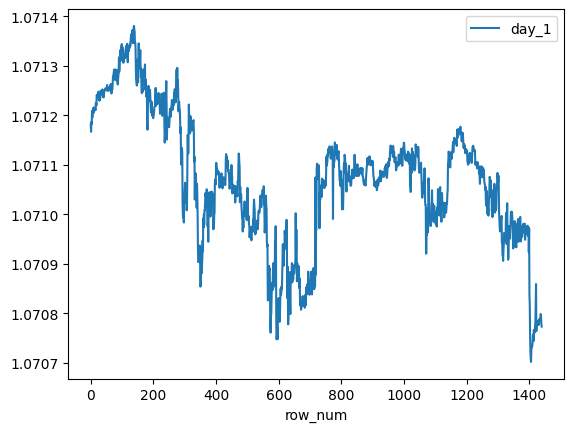

In [ ]:

s.plot()

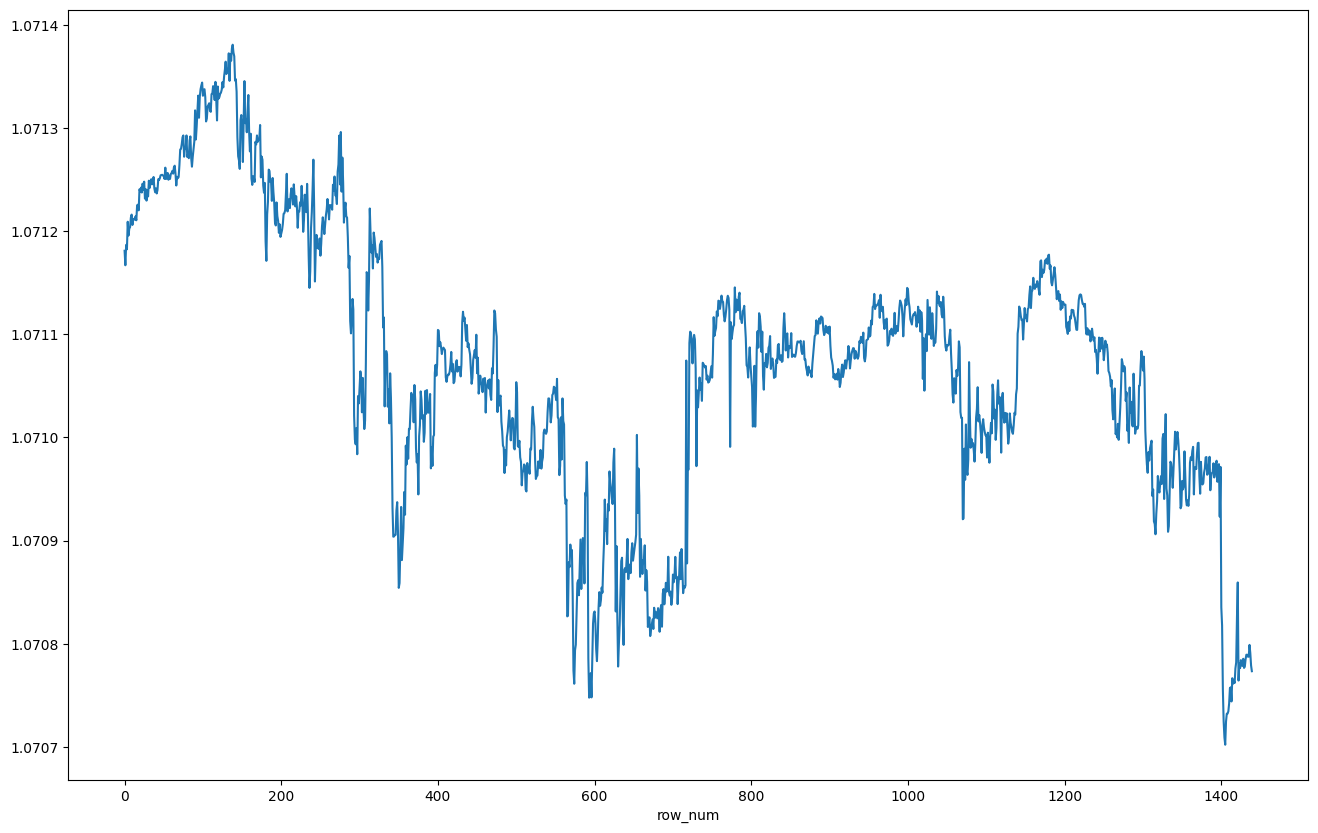

In [ ]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120

ax = y_pred.plot(figsize = (16, 10)) 

In [ ]:
#contrast leaderboard result of train and test data
predictor.leaderboard(df_train, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForest_BAG_L2,-0.000044,-0.000127,3.871026,2.760871,94.150656,0.218176,0.341891,27.890253,2,True,10
1,ExtraTrees_BAG_L2,-0.000044,-0.000124,3.806957,2.726061,71.506839,0.154107,0.307081,5.246436,2,True,11
2,WeightedEnsemble_L3,-0.000047,-0.000122,4.690823,4.040426,100.634943,0.003050,0.001000,0.249892,3,True,16
3,ExtraTrees_BAG_L1,-0.000047,-0.000129,0.149293,0.393167,4.380101,0.149293,0.393167,4.380101,1,True,3
4,RandomForest_BAG_L1,-0.000051,-0.000139,0.183589,0.457081,22.456219,0.183589,0.457081,22.456219,1,True,2
5,WeightedEnsemble_L2,-0.000067,-0.000122,0.249805,0.592111,4.626823,0.003800,0.001013,0.193118,2,True,8
6,KNeighbors_BAG_L1,-0.000090,-0.000124,0.096712,0.197931,0.053604,0.096712,0.197931,0.053604,1,True,1
7,XGBoost_BAG_L2,-0.000094,-0.000145,4.132972,2.522969,75.556019,0.480122,0.103989,9.295616,2,True,13
8,LinearModel_BAG_L2,-0.000105,-0.000150,4.315490,3.390454,67.248362,0.662640,0.971474,0.987959,2,True,14
9,LinearModel_BAG_L1,-0.000133,-0.000186,0.708161,0.535869,0.851859,0.708161,0.535869,0.851859,1,True,6


In [ ]:
predictor.info()

{'path': 'agModels-predict_day1\\',
 'label': 'day_1',
 'random_state': 0,
 'version': '0.7.0',
 'features': ['day_440',
  'day_439',
  'day_438',
  'day_437',
  'day_436',
  'day_435',
  'day_434',
  'day_433',
  'day_432',
  'day_431',
  'day_430',
  'day_429',
  'day_428',
  'day_427',
  'day_426',
  'day_425',
  'day_424',
  'day_423',
  'day_422',
  'day_421',
  'day_420',
  'day_419',
  'day_418',
  'day_417',
  'day_416',
  'day_415',
  'day_414',
  'day_413',
  'day_412',
  'day_411',
  'day_410',
  'day_409',
  'day_408',
  'day_407',
  'day_406',
  'day_405',
  'day_404',
  'day_403',
  'day_402',
  'day_401',
  'day_400',
  'day_399',
  'day_398',
  'day_397',
  'day_396',
  'day_395',
  'day_394',
  'day_393',
  'day_392',
  'day_391',
  'day_390',
  'day_389',
  'day_388',
  'day_387',
  'day_386',
  'day_385',
  'day_384',
  'day_383',
  'day_382',
  'day_381',
  'day_380',
  'day_379',
  'day_378',
  'day_377',
  'day_376',
  'day_375',
  'day_374',
  'day_373',
  'day_3

In [ ]:
# predictor.unpersist_models('agModels-predict_day1')
# predictor.save_space()
# predictor.delete_models(models_to_keep='best', dry_run=False)
##undelete below if need to save a fresh model each run.
!rm -rf agModels-predict_day1
!ls